# ВКР по курсу «Data Science PRO» Пронкин Сергей Игоревич

ОПИСАНИЕ ЗАДАНИЯ:
* В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub и разместить там код исследования. 
* Оформить файл README.

## ТЕОРЕТИЧЕСКАЯ ОСНОВА

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## РАЗВЕДКА ДАННЫХ

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Пути для гугл драйв
# nb_path = '/content/drive/MyDrive/Colab Notebooks/'
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [3]:
# Пути для локального запуска
# nb_path = ''
# data_path = '../data/'
# models_path = '../models/'

In [1]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [2]:
# Модели машинного обучения

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
# Еще  библиотеки
from pandas import read_excel, DataFrame, Series
from numpy.random import seed
from scipy import stats
import warnings

In [4]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras


In [5]:
# Проверка версии библиотеки
print(tf.__version__) 

2.18.0


In [8]:
! pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
! pip install jinja2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 1809

In [350]:
# Загружаем первый датасет (базальтопластик)
df_bp = pd.read_excel(r"X_bp.xlsx")

# Удаляем первый неинформативный столбец (Unnamed: 0)
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)

# Проверим размерность первого датасета
print("Размерность первого датасета (базальтопластик):", df_bp.shape)

# Посмотрим на первые 5 строк первого датасета
print("Первые 5 строк первого датасета:")
print(df_bp.head())

# Загружаем второй датасет (углепластик)
df_nup = pd.read_excel(r"X_nup.xlsx")

# Удаляем первый неинформативный столбец (Unnamed: 0) во втором датасете
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)

# Проверим размерность второго датасета
print("Размерность второго датасета (углепластик):", df_nup.shape)

# Посмотрим на первые 5 строк второго датасета
print("Первые 5 строк второго датасета:")
print(df_nup.head())

Размерность первого датасета (базальтопластик): (1023, 10)
Первые 5 строк первого датасета:
   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  П

In [21]:
# X_bp.drop(['Number'], axis=1, inplace=True)

In [23]:
# Загрузка исходные данные из файла X_nup
# X_nup = pd.read_excel('X_nup.xlsx')
# X_nup.shape

(1040, 4)

In [24]:
# X_nup.drop(['Number'], axis=1, inplace=True)

In [22]:
# X_bp.sample (10)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
413                          2.241090       1920.337789   
441                          2.392643       1928.292618   
1002                         2.195568       2076.471296   
219                          2.367495       1926.596503   
644                          2.506578       1844.134025   
838                          3.990794       2018.231213   
793                          3.059071       1924.198106   
474                          2.977193       2007.427985   
194                          1.938589       2013.245026   
451                          1.421778       1861.331537   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
413             1199.071367                    78.204336   
441              280.722589                    97.583261   
1002             180.945421                   114.926148   
219              932.803560                    86.777652   
644              584.068718                    80.433325   
838              710.831426                   101.903836   
793             1105.682017                    97.125855   
474              399.270355                   110.099044   
194              165.365656                   134.860407   
451              542.141709                   120.304348   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
413                         22.816556                296.431553   
441                         17.872587                288.044441   
1002                        22.587418                285.319055   
219                         24.810188                272.239213   
644                         23.972972                281.881487   
838                         21.195527                227.564104   
793                         21.115561                286.302097   
474                         20.181501                236.656654   
194                         23.283868                280.124802   
451                         22.329712                261.397408   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
413                      599.496721                             69.847831   
441                       71.020110                             75.934807   
1002                     712.126880                             70.780802   
219                      267.140817                             74.868684   
644                      380.095256                             71.429828   
838                      700.659837                             73.550433   
793                      632.402514                             73.170927   
474                       46.652325                             67.265648   
194                      342.660952                             74.404947   
451                      445.035186                             75.180842   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
413                     3225.847835               205.078858  
441                     2708.629012               314.309799  
1002                    1966.671431               288.552218  
219                     2883.636497               271.913716  
644                     1614.871843               248.532144  
838                     2647.588058               239.096087  
793                     3000.078005               197.786450  
474                     2590.635747               100.379499  
194                     2156.666591               222.299403  
451                     3334.709520               202.737709

In [26]:
# X_nup.sample(10)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
68                    0    10.622886          47.549771
703                  90     4.063183          61.764555
613                  90     5.549221          52.714374
487                   0    10.466131          82.525493
523                   0     5.545439          54.604251
651                  90     4.410737          54.046375
713                  90     3.268975          67.038824
143                   0     7.150886          48.315936
414                   0     6.370798          52.422363
247                   0     8.565812          85.987174

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

## Список признаков

In [27]:
# Признаки для базальтопластика
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [28]:
# Признаки для Углепластика
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

## Объединение датасетов с типом INNER 
Ожидаю, что  должно остаться не более 1023 строк

In [351]:
# Понимаем, что два датасета имеют разный объем строк. 
# Для задачи нужно объединить их в один набор данных. 
# Используем объединение типа INNER, чтобы оставить только те строки, которые есть в обоих датасетах по индексам.

# Объединяем датасеты по индексам, оставляя только общие строки
df = df_bp.merge(df_nup, left_index=True, right_index=True, how='inner')

# Выводим первые несколько строк после объединения для проверки
print("Первые 5 строк объединенного датасета:")
df.head().T


Первые 5 строк объединенного датасета:


0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [352]:
df.shape

(1023, 13)

In [353]:
# Сохраню объединенные данные
df.to_excel('data_merged.xlsx')

Объедененный датасет готов к проведению анализа.

# ------------------------------------------------
## 2. Изучение  данных
# ------------------------------------------------

In [354]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Вывод: Признаков с  типом object в датасете нет! DATA сет хорошо подготовлен

In [355]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [356]:
# Посмотрю описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

### Промежуточный результат: Нужно провести преобразование значений поля "Угол нашивки"

In [357]:
# Проверка количества записей, где 'Угол нашивки' равен 0
angle_0_count = df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()
print(f"Количество элементов, где 'Угол нашивки' равен 0: {angle_0_count}")

# Приведение столбца 'Угол нашивки, град' к значениям 0 и 1 и преобразование в тип integer
df = df.replace({'Угол нашивки, град': {0.0: 0, 90.0: 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

# Переименование столбца
df = df.rename(columns={'Угол нашивки, град': 'Угол нашивки'})

# Проверка количества записей, где 'Угол нашивки' равен 0 после преобразования
angle_0_after = df['Угол нашивки'][df['Угол нашивки'] == 0].count()
print(f"Количество элементов, где 'Угол нашивки' равен 0 после преобразования: {angle_0_after}")

# Преобразование индекса в тип integer
df.index = df.index.astype('int')

# Сохранение итогового датасета
df.to_excel("cleaned_data.xlsx")

Количество элементов, где 'Угол нашивки' равен 0: 520
Количество элементов, где 'Угол нашивки' равен 0 после преобразования: 520


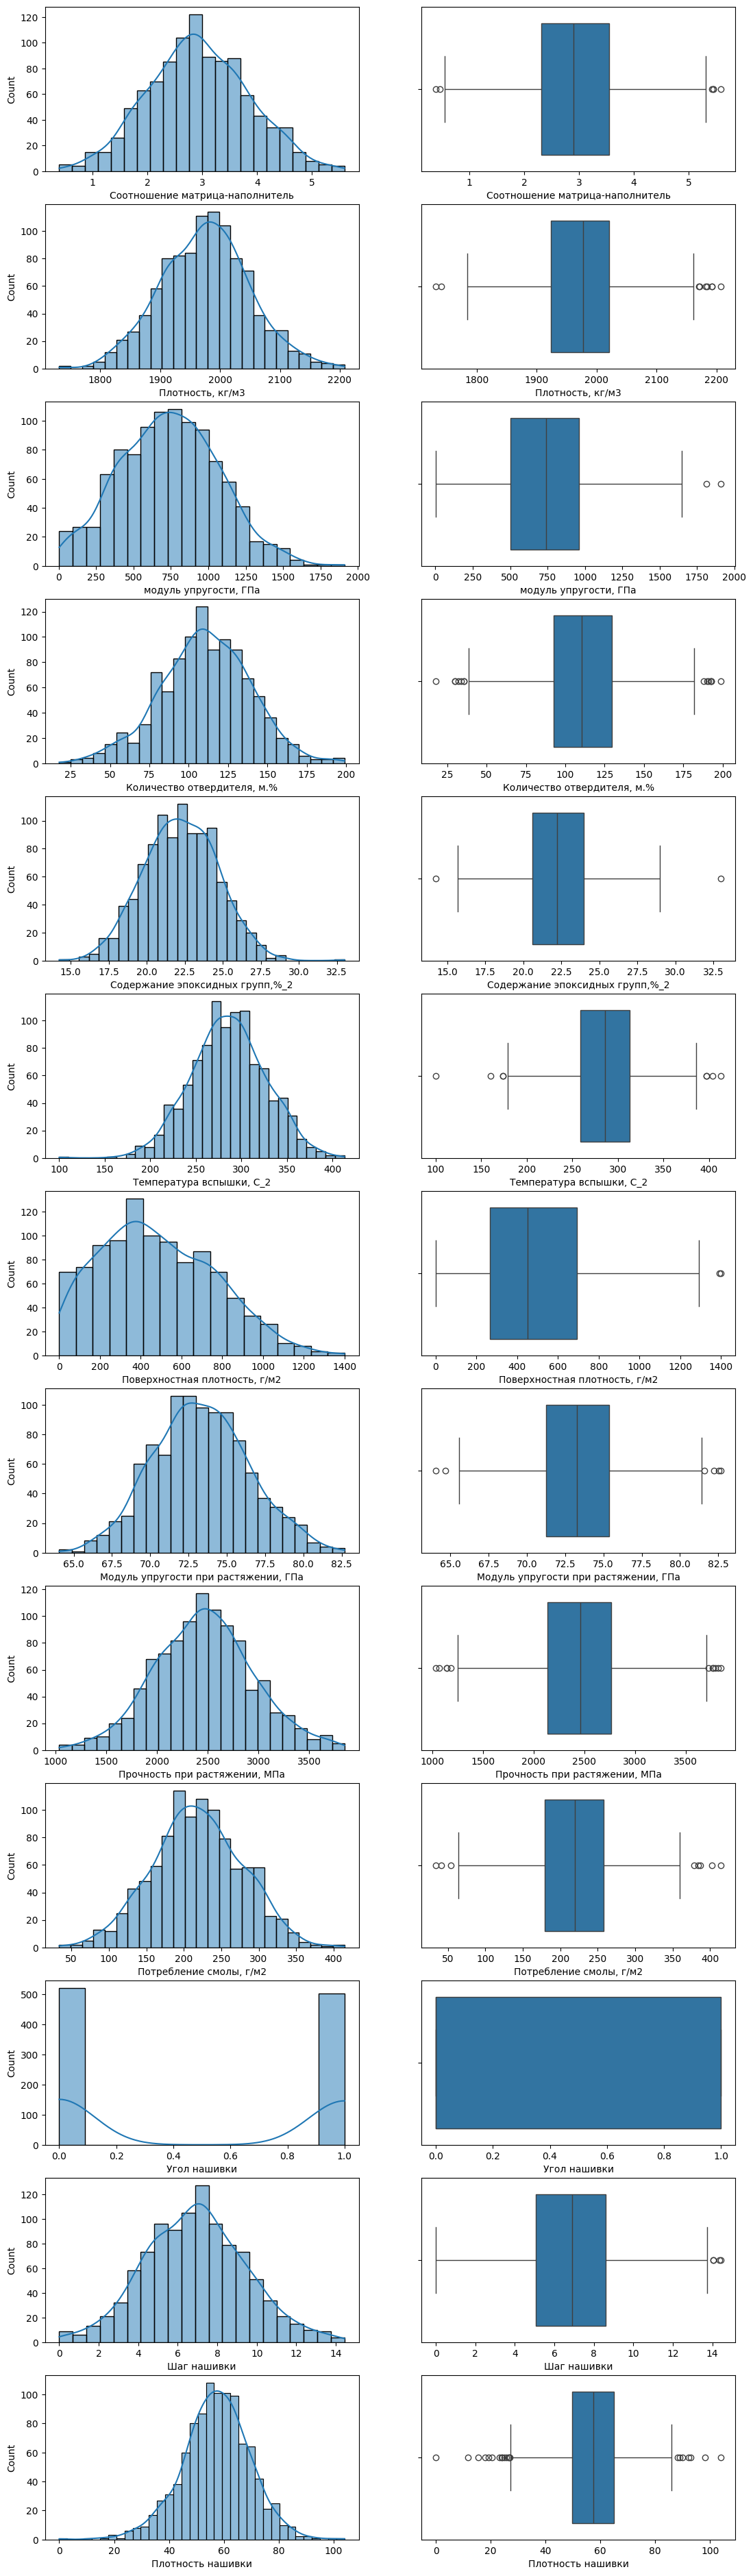

In [37]:
# Построю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки" приведен к форме бинарного признака

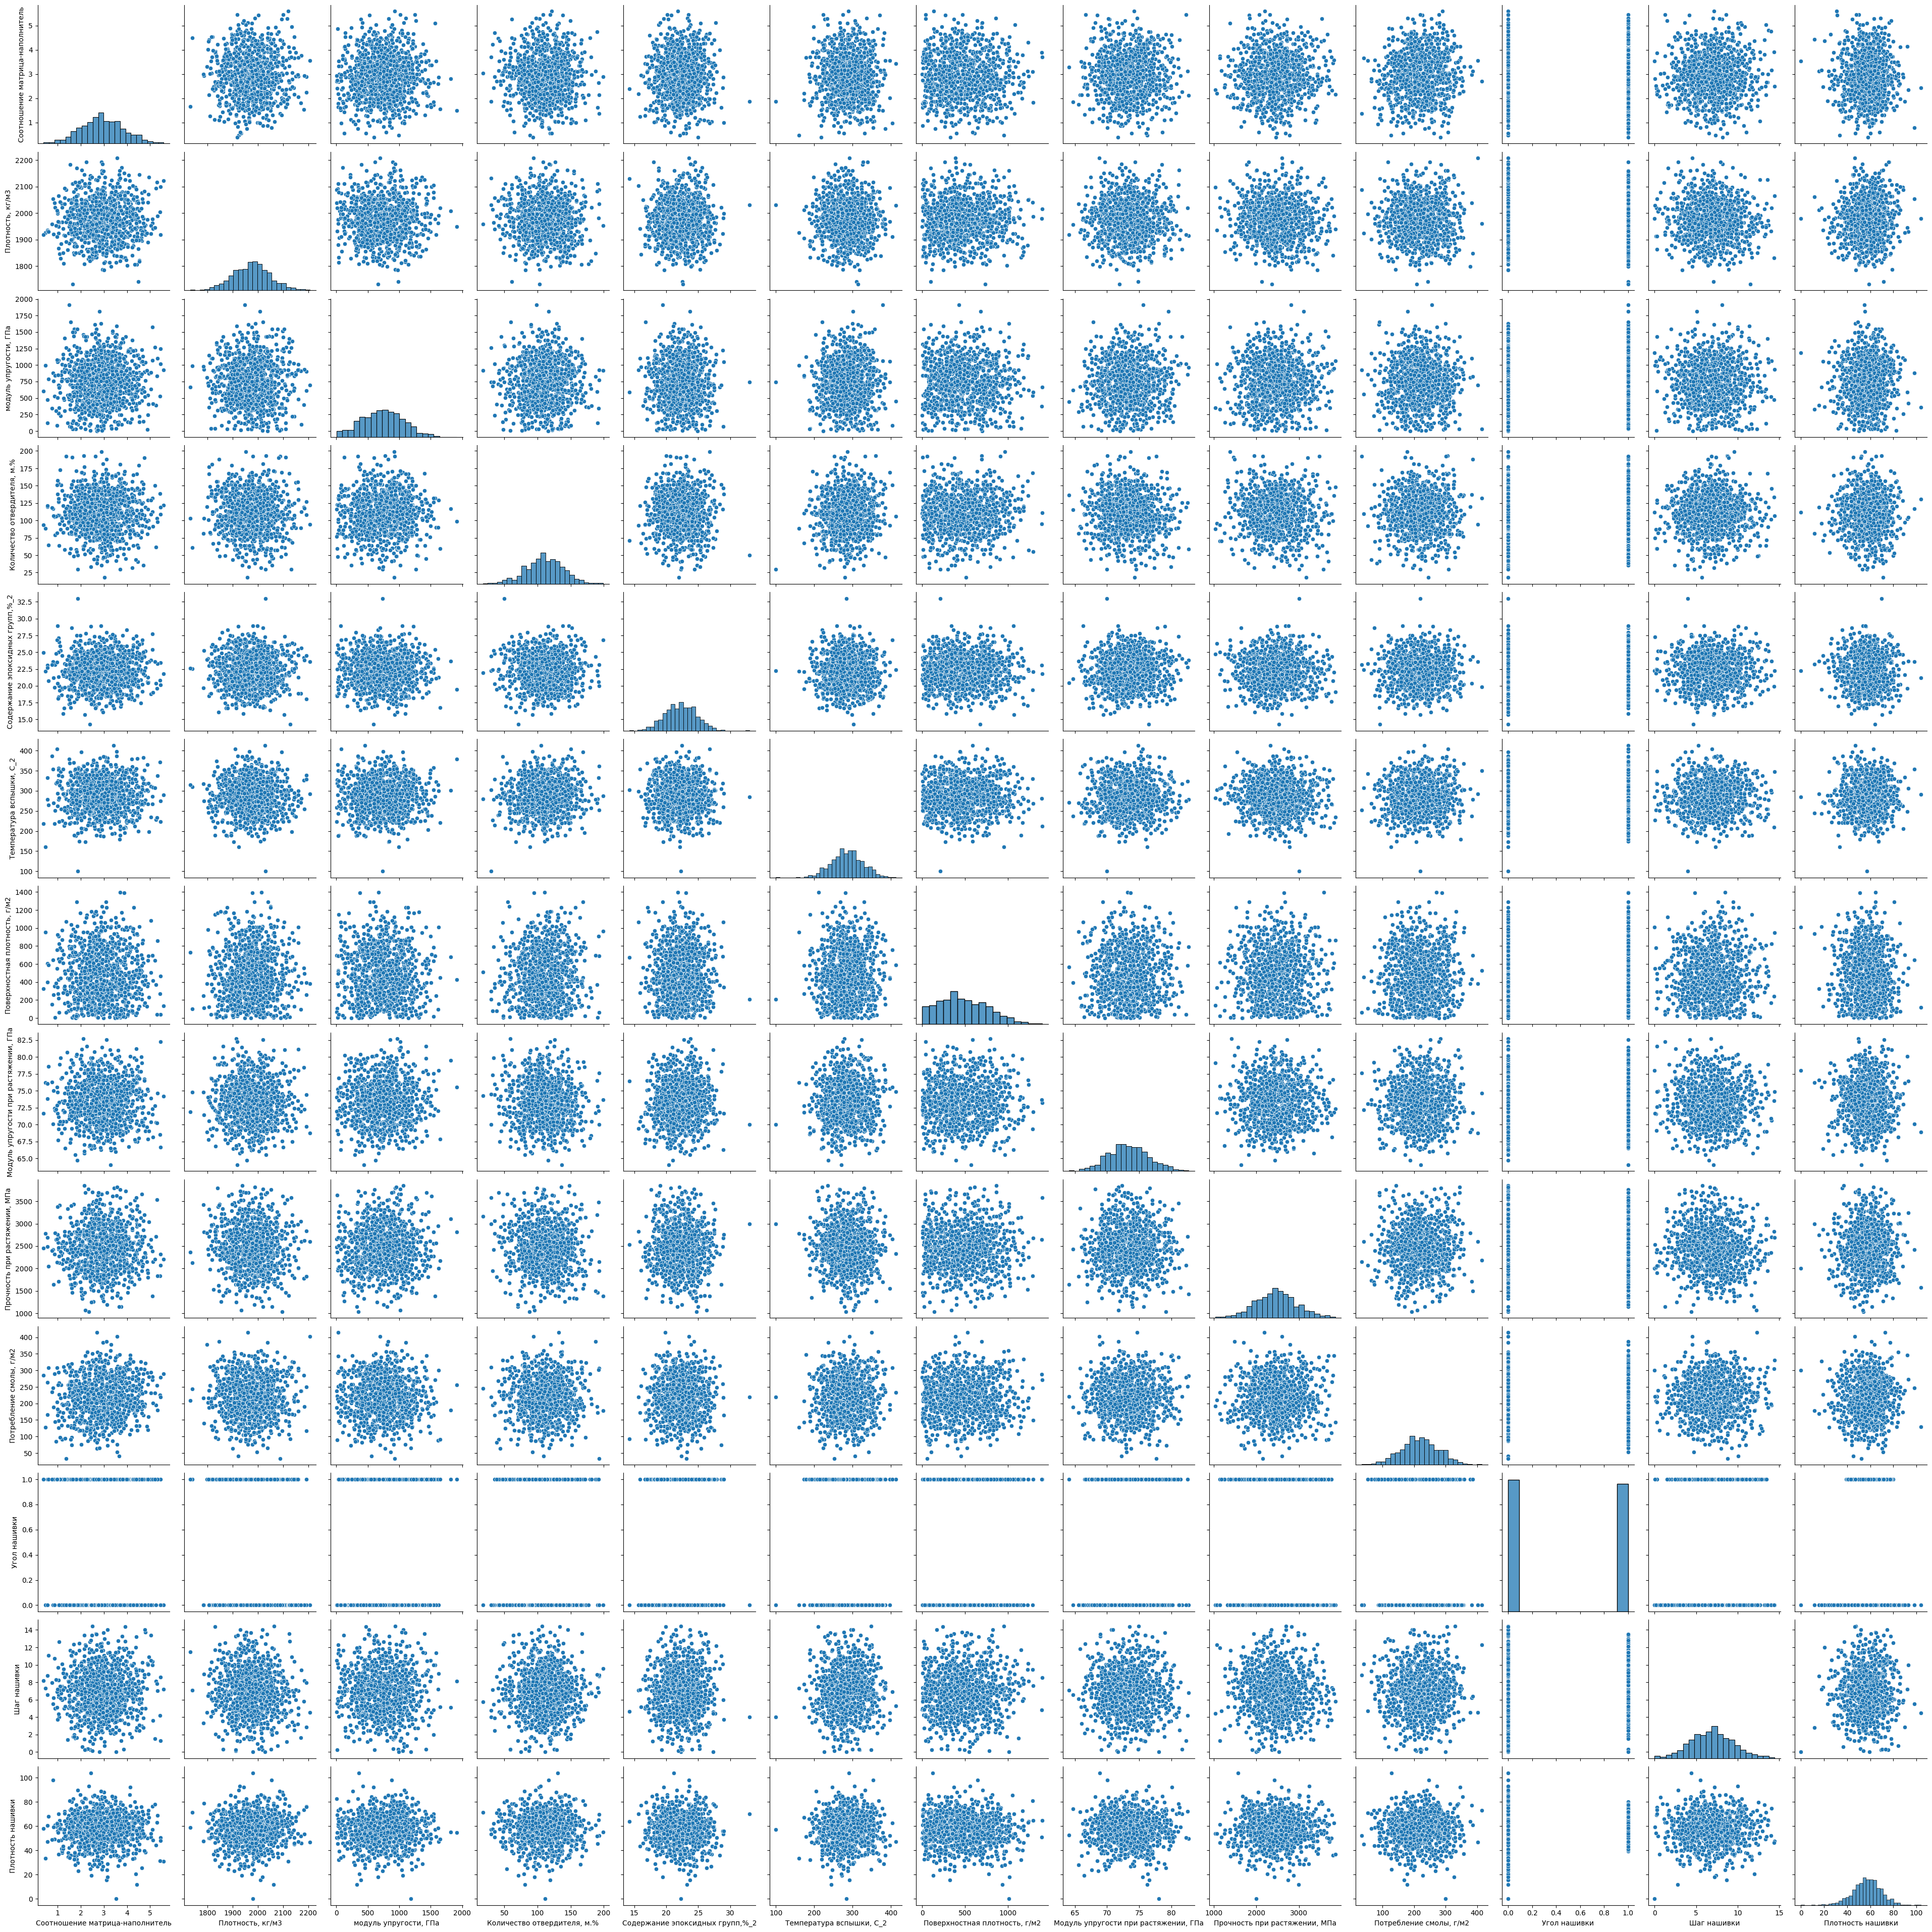

In [38]:
# Построю попарные графики рассеяния
sns.pairplot(df, height=3);

Матрица корреляции

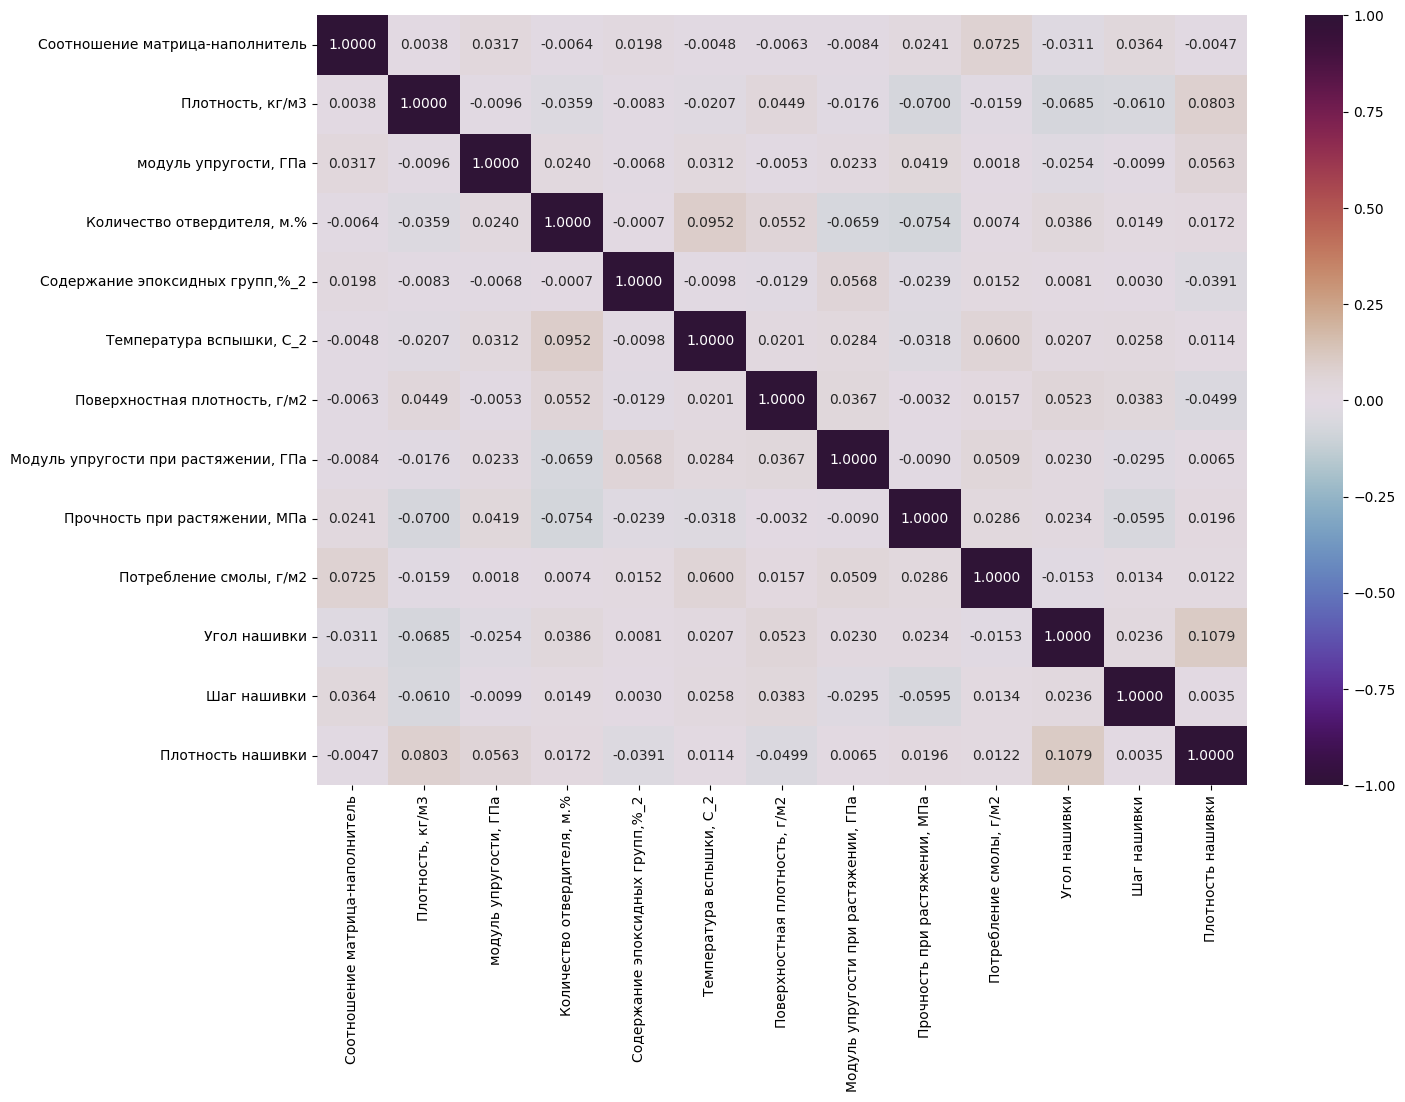

In [54]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.4f', cmap='twilight_shifted', ax=ax)
plt.show()

Корреляция между метриками  почти нулевая. Фактически между признаками нет линейной зависимости. Уже можно сделать предположение  о том, что методы линейной регресси не  дадут  хорошего результата.

## Смотрим на пропущенные значения

In [358]:
missing_data = df.isnull().sum()
print(f"Пропущенные данные по каждому столбцу: {missing_data}")


Пропущенные данные по каждому столбцу: Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


### Результат: Пропущенных значений не обнаружено

## Проверяем на наличе дубликатов

In [359]:
duplicate_count = df.duplicated().sum()
print(f"Количество дубликатов в датасете: {duplicate_count}")

Количество дубликатов в датасете: 0


### Результат: Дубликатов не обнаружено

## Находим среднее значение и медиану для каждого признака

In [360]:
mean_values = df.mean() # среднее значение
median_values = df.median() # значение медианы

print(f"Средние значения для каждого столбца: {mean_values}")
print(f"\nМедианные значения для каждого столбца: {median_values}")

Средние значения для каждого столбца: Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки                               0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

Медианные значения для каждого столбца: Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных 

# --------------------------------------------------------------------------------------------
## 3. Поиск выбросов
# --------------------------------------------------------------------------------------------

### 0. Нормализация данных методом MinMaxScaller

In [428]:
# MinMax = MinMaxScaler()
df = pd.read_excel(r"cleaned_data.xlsx")
df_copy=df.copy() #Копия дата_сета
df_norm = df.copy() # Копия для нормализации
# df_norm [df_norm.columns] = MinMax.fit_transform(df_norm)
df_norm.describe(include='all')

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
count  1023.000000                      1023.000000       1023.000000   
mean    511.000000                         2.930366       1975.734888   
std     295.458965                         0.913222         73.729231   
min       0.000000                         0.389403       1731.764635   
25%     255.500000                         2.317887       1924.155467   
50%     511.000000                         2.906878       1977.621657   
75%     766.500000                         3.552660       2021.374375   
max    1022.000000                         5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                    1023.000000              1023.000000   1023.000000   
mean                     2466.922843               218.423144      0.491691   
std                       485.628006                59.735931      0.500175   
min                      1036.856605                33.803026      0.000000   
25%                      2135.850448               179.627520      0.000000   
50%                      2459.524526               219.198882      0.000000   
75%                      2767.193119               257.481724      1.000000   
max                      3848.436732               414.590628      1.000000   

       Шаг нашивки  Плотность нашивки  
count  1023.000000        1023.000000  
mean      6.899222          57.153929  
std       2.563467          12.350969  
min       0.000000           0.000000  
25%       5.080033          49.799212  
50%       6.916144          57.341920  
75%       8.586293          64.944961  
max      14.440522         103.988901

In [429]:
df_norm.to_excel('data_before_cleaned.xlsx')
df_norm.shape

(1023, 14)

In [430]:
missing_values_after_cleanup = df.isnull().sum()
print("Количество пропусков (NaN) по каждому столбцу после удаления выбросов:")
print(missing_values_after_cleanup)

Количество пропусков (NaN) по каждому столбцу после удаления выбросов:
Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


### 1. Метод межквартильных расстояний

Unnamed: 0: iq=0


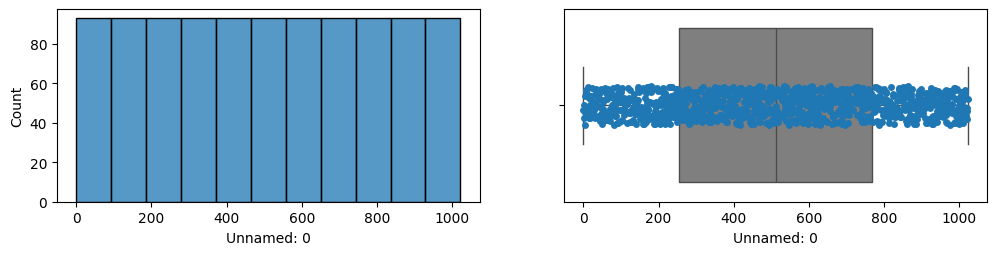

Соотношение матрица-наполнитель: iq=6


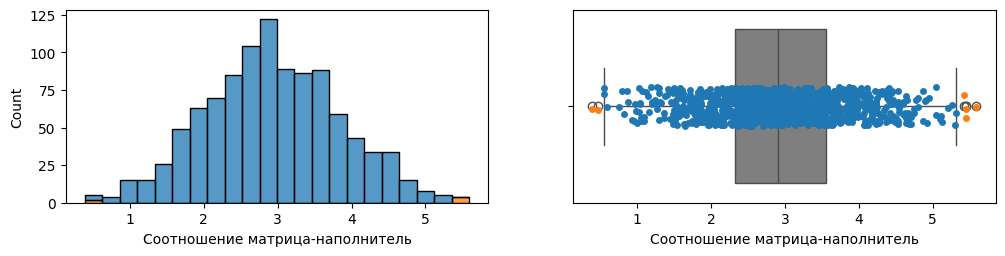

Плотность, кг/м3: iq=9


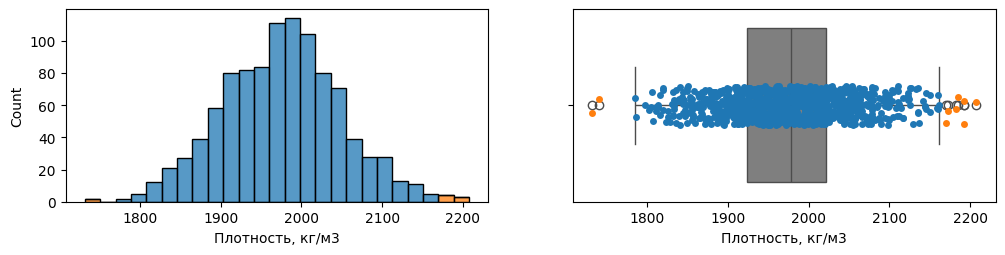

модуль упругости, ГПа: iq=2


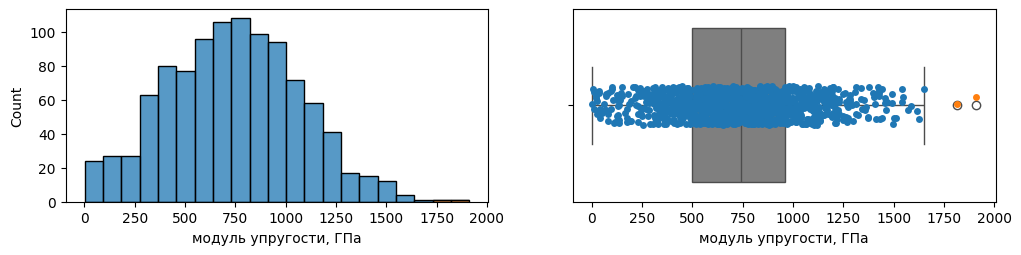

Количество отвердителя, м.%: iq=14


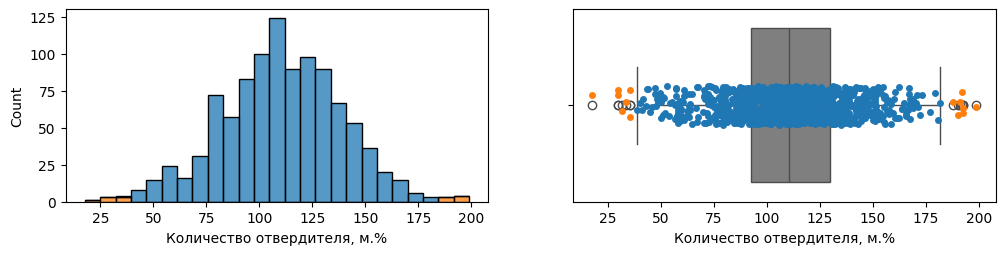

Содержание эпоксидных групп,%_2: iq=2


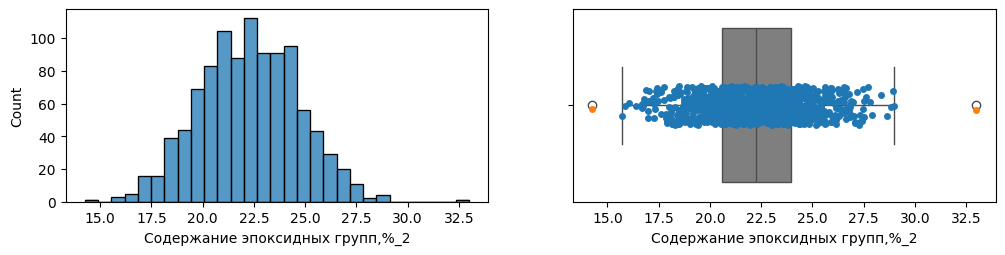

Температура вспышки, С_2: iq=8


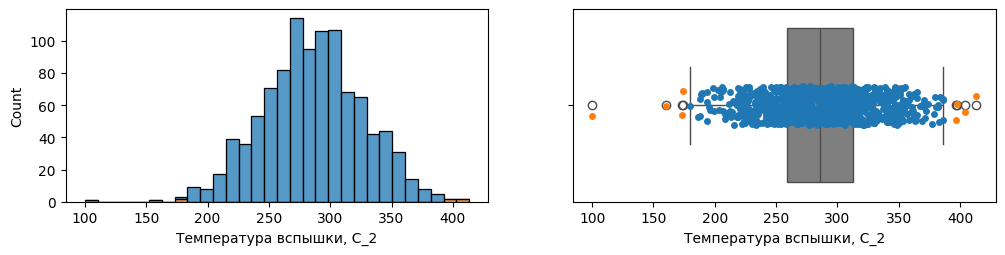

Поверхностная плотность, г/м2: iq=2


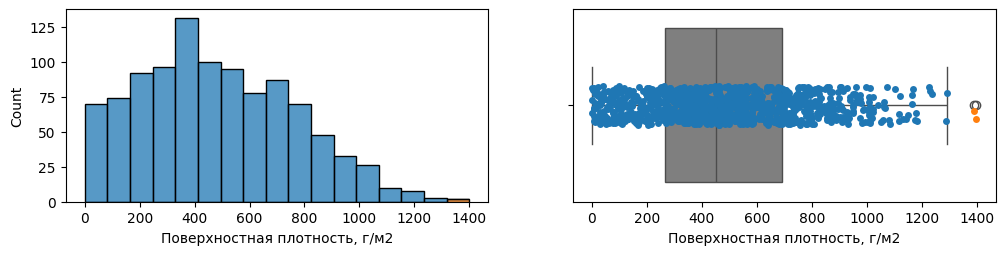

Модуль упругости при растяжении, ГПа: iq=6


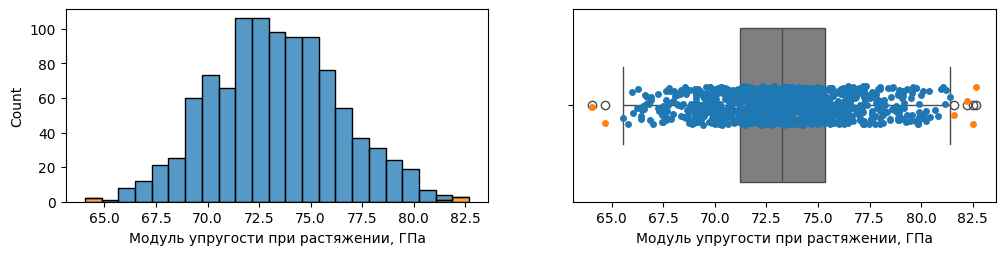

Прочность при растяжении, МПа: iq=11


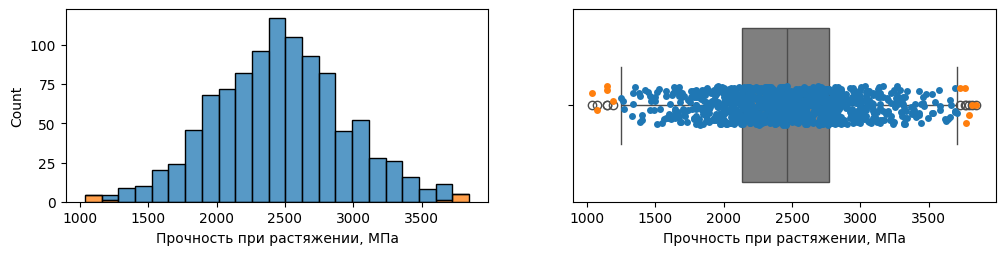

Потребление смолы, г/м2: iq=8


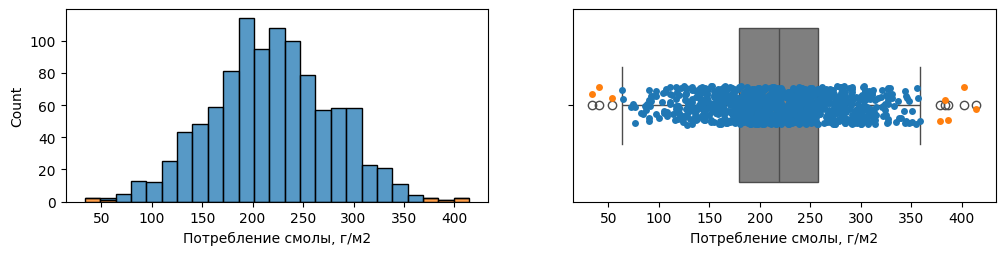

Угол нашивки: iq=0


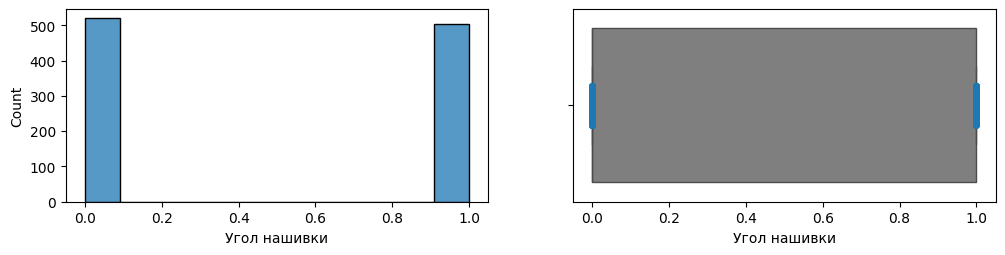

Шаг нашивки: iq=4


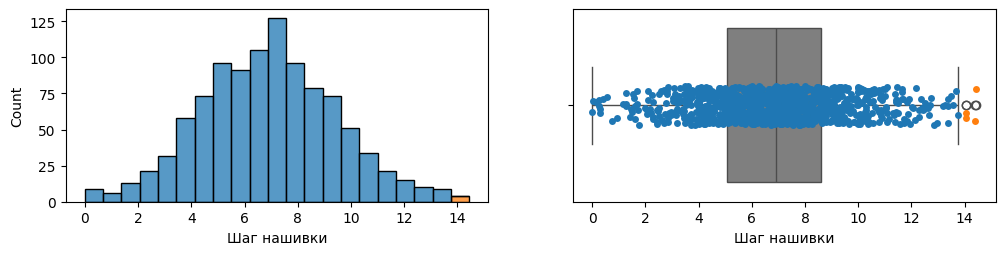

Плотность нашивки: iq=21


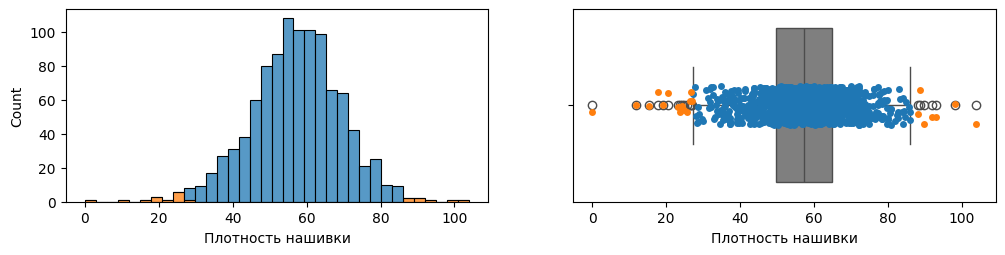

Метод межквартильных расстояний, выбросов: 93


In [431]:
# методом межквартильных расстояний
count_iq = 0
for column in df:
    d = df_norm.loc[:, [column]]
    q1 = np.quantile(df_norm[column], 0.25)
    q3 = np.quantile(df_norm[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df_norm[column] <= lower) | (df_norm[column] >= upper)
    count_iq += d['iq'].sum()
    
    # визуализация выбросов
    print('{}: iq={}'.format(column, d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='iq', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод межквартильных расстояний, выбросов:', count_iq)

#### Результат: Методом межквартильных расстояний определено 93 выброса

### 2. Метод 3-х сигм

Unnamed: 0: 3s=0


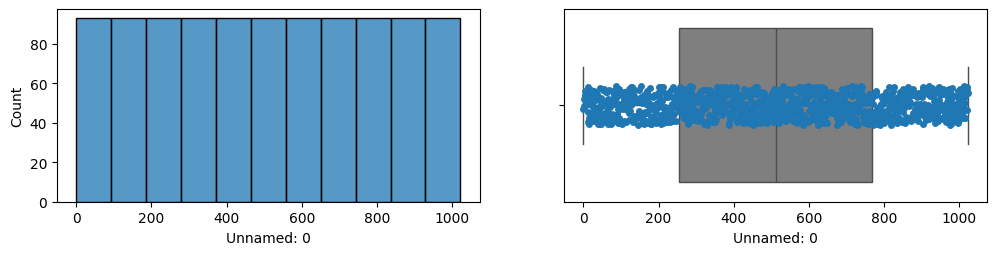

Соотношение матрица-наполнитель: 3s=0


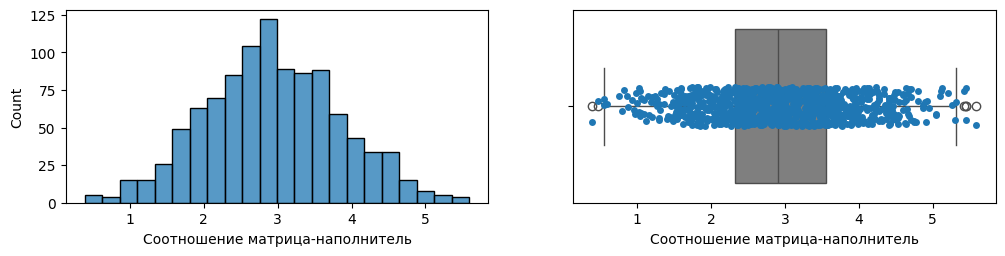

Плотность, кг/м3: 3s=3


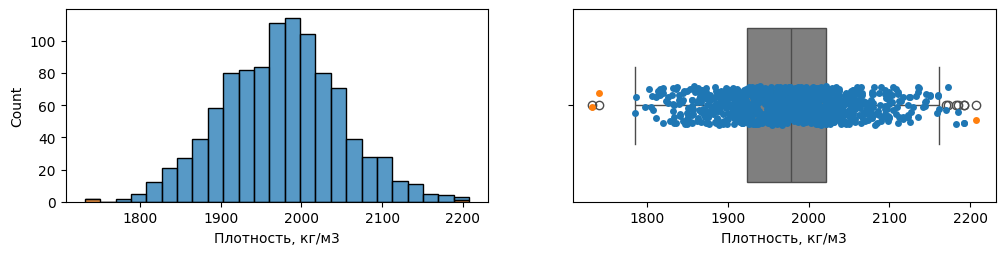

модуль упругости, ГПа: 3s=2


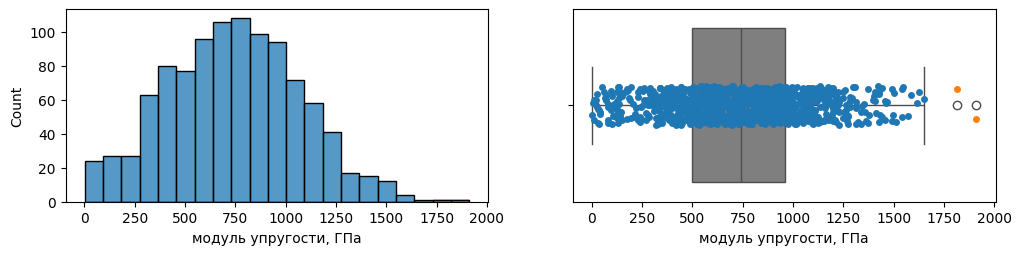

Количество отвердителя, м.%: 3s=2


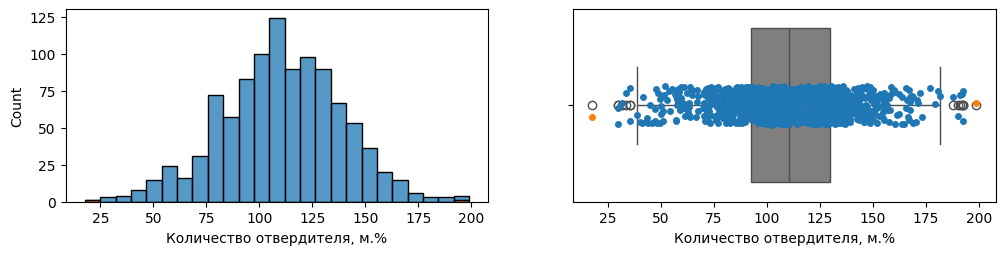

Содержание эпоксидных групп,%_2: 3s=2


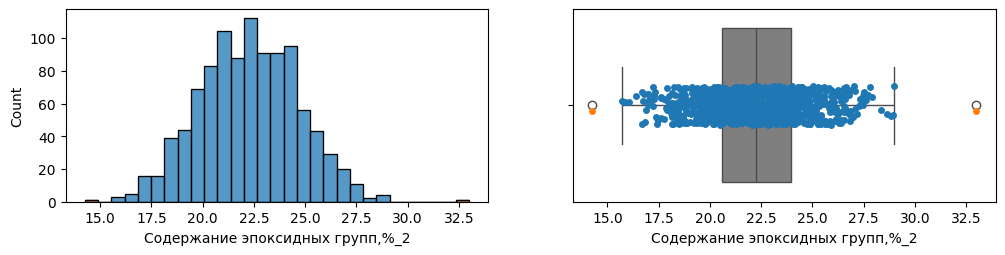

Температура вспышки, С_2: 3s=3


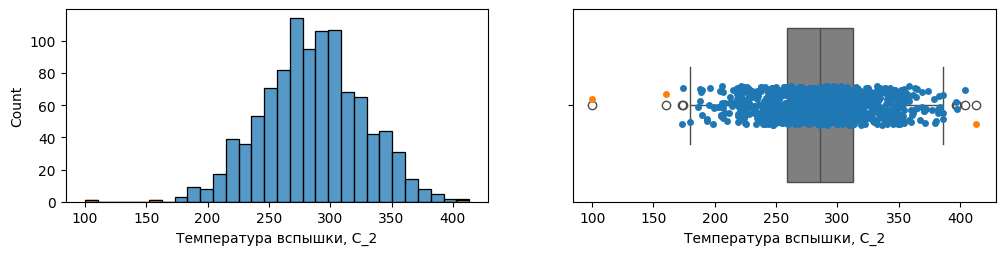

Поверхностная плотность, г/м2: 3s=2


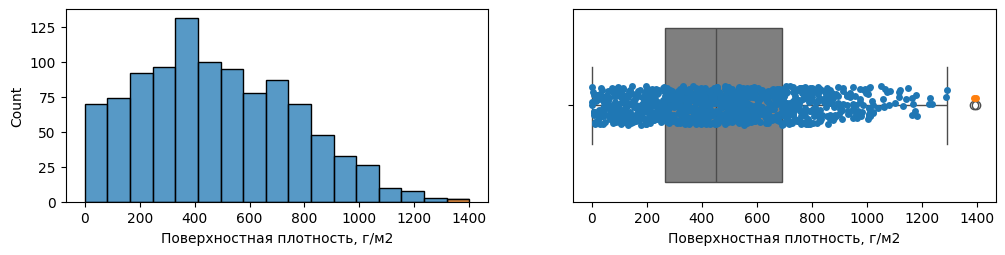

Модуль упругости при растяжении, ГПа: 3s=0


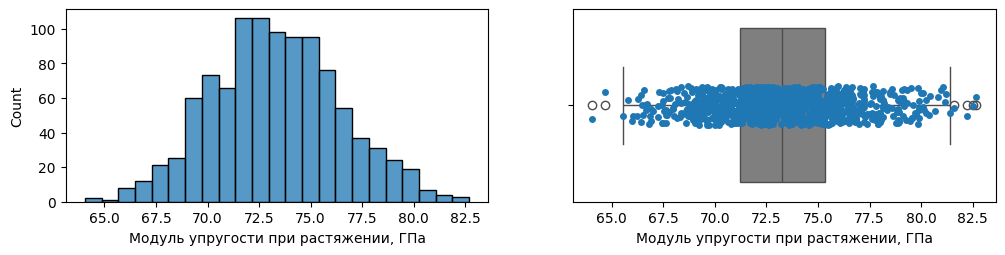

Прочность при растяжении, МПа: 3s=0


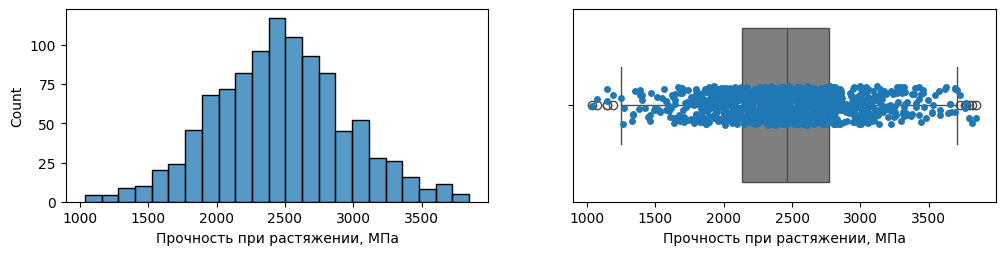

Потребление смолы, г/м2: 3s=3


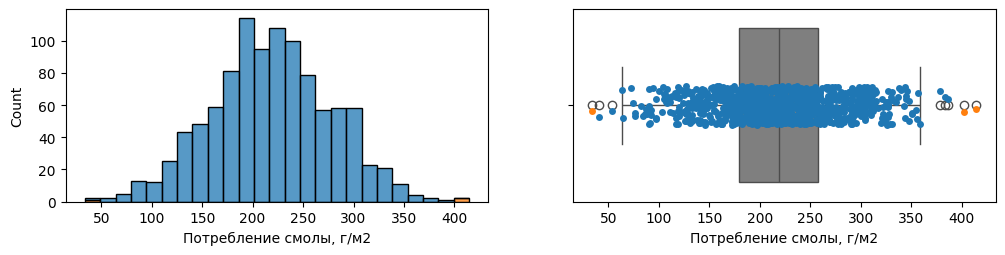

Угол нашивки: 3s=0


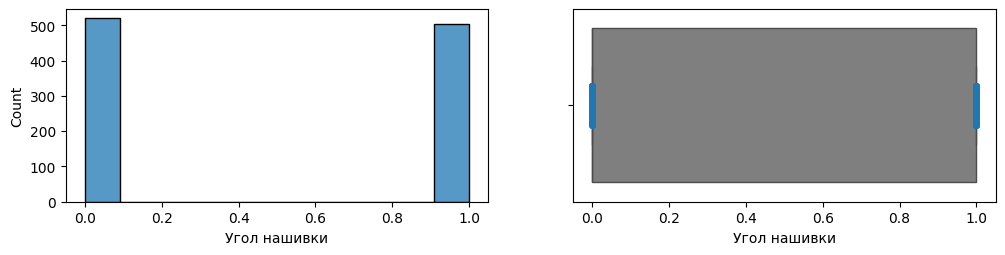

Шаг нашивки: 3s=0


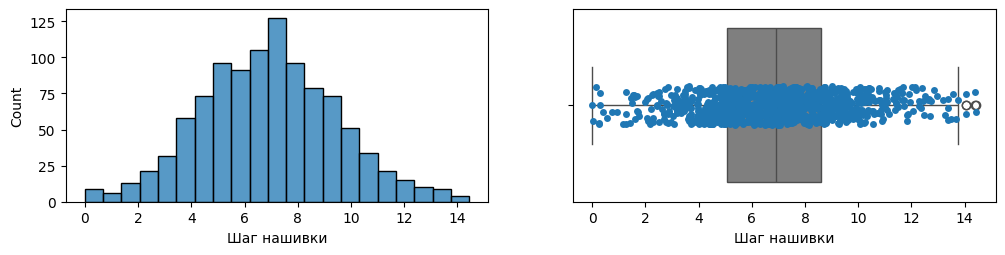

Плотность нашивки: 3s=7


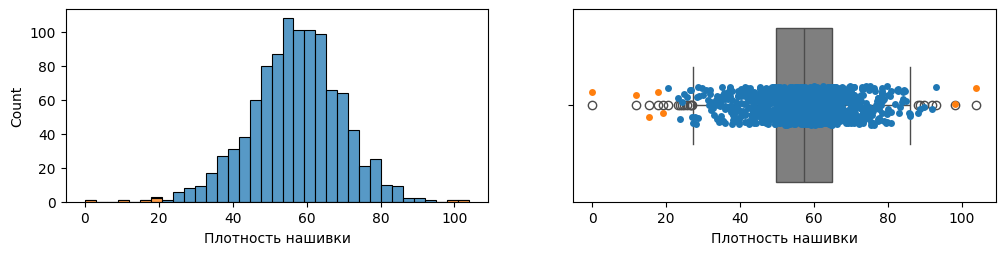

Метод 3-х сигм, выбросов: 24


In [432]:
count_3s = 0

for column in df:
    d = df_norm.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df_norm[column] - df_norm[column].mean()) / df_norm[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()

    # визуализация выбросов
    print('{}: 3s={}'.format(column, d['3s'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['3s']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['3s']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)

### Методом 3-x Сигм определено 24 выброса

### ВЫВОД: Выбираю метод межквартильных расстояний, так как с его помощью можно исключить максимальное количество выбросов. 
Это конечно может повлиять на качество  данных, но все же считаю, что выбросы  нужно исключить

## Удаление выбросов

In [342]:
# Удалить выбросы методом 3-х сигм
# outliers = pd.DataFrame(index=df_norm.index)
# for column in df:
    # zscore = (df_norm[column] - df_norm[column].mean()) / df_norm[column].std()
    # outliers[column] = (zscore.abs() > 3)
# df_norm = df_norm[outliers.sum(axis=1)==0]
# df_norm.shape

In [138]:
# Удаление выбросов методом межквартильных расстояний
# outliers = pd.DataFrame(index=df_norm.index)
# for column in df_norm:
    # q1 = np.quantile(df_norm[column], 0.25)
    # q3 = np.quantile(df_norm[column], 0.75)
    # iqr = q3 - q1
    # lower = q1 - 1.5 * iqr
    # upper = q3 + 1.5 * iqr
    # outliers[column] = ((df_norm[column] <= lower) | (df_norm[column] >= upper))
    ## count_iq += d['iq'].sum()
# df_norm = df_norm[outliers.sum(axis=1)==0]
# df_norm.shape

In [433]:
# Проверим наличие пропусков и выбросов в данных
if df_norm.isnull().sum().sum() == 0:
    print("Пропуски в данных отсутствуют.")
else:
    print(f"Пропуски найдены в {df_norm.isnull().sum().sum()} ячейках.")

# Шаг 1: Обнаружение и удаление выбросов
# Для выявления выбросов используем метод IQR (Interquartile Range)

Q1 = df_norm.quantile(0.25)
Q3 = df_norm.quantile(0.75)
IQR = Q3 - Q1

# Определим границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определим, сколько значений выходят за пределы этих границ
outliers = ((df_norm < lower_bound) | (df_norm > upper_bound)).sum()

# Отобразим количество выбросов для каждого столбца
print("Количество выбросов в каждом столбце:")
print(outliers)

# Удаляем строки с выбросами
df_cleaned = df_norm[~((df_norm < lower_bound) | (df_norm > upper_bound)).any(axis=1)]

# Проверим, сколько строк осталось после удаления выбросов
print(f"Количество строк после удаления выбросов: {df_cleaned.shape[0]}")

Пропуски в данных отсутствуют.
Количество выбросов в каждом столбце:
Unnamed: 0                               0
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64
Количество строк после удаления выбросов: 936


In [434]:
# Создадим копию DataFrame для работы
m = df.copy()

# Считаем Z-оценки (отклонения) для каждого столбца
z_scores = (df_norm - df_norm.mean()) / df_norm.std()

# Посчитаем количество выбросов в каждом столбце
outliers_count = (z_scores.abs() > 3).sum()

# Выведем количество выбросов для каждого столбца
for column, count in outliers_count.items():
    print(f"{count} выбросов в признаке {column}")

# Подсчитаем общее количество выбросов
total_outliers = outliers_count.sum()
print(f'Всего {total_outliers} выбросов')


0 выбросов в признаке Unnamed: 0
0 выбросов в признаке Соотношение матрица-наполнитель
3 выбросов в признаке Плотность, кг/м3
2 выбросов в признаке модуль упругости, ГПа
2 выбросов в признаке Количество отвердителя, м.%
2 выбросов в признаке Содержание эпоксидных групп,%_2
3 выбросов в признаке Температура вспышки, С_2
2 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
3 выбросов в признаке Потребление смолы, г/м2
0 выбросов в признаке Угол нашивки
0 выбросов в признаке Шаг нашивки
7 выбросов в признаке Плотность нашивки
Всего 24 выбросов


In [435]:
# Создаем переменную для списка признаков с выбросами
outliers_columns = z_scores.columns[(z_scores.abs() > 3).any()]

# Преобразуем список в формат для удаления
column_list_drop = outliers_columns.tolist()

# Выведем список столбцов с выбросами
print("Список признаков с выбросами для удаления:")
print(column_list_drop)

Список признаков с выбросами для удаления:
['Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 'Плотность нашивки']


In [436]:
# Исключим выбросы из всех столбцов с выбросами методом межквартильного расстояния (1,5 межквартильных размаха)
# Мы будем заменять значения, выходящие за пределы на NaN

# Для каждого столбца, где есть выбросы, применим метод межквартильных расстояний
for column in column_list_drop:
    # Вычисляем квартильные значения
    Q1 = np.percentile(df_norm[column], 25)
    Q3 = np.percentile(df_norm[column], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Заменяем значения на NaN, если они выходят за пределы (ниже минимального или выше максимального)
    df_norm[column] = df_norm[column].apply(lambda x: np.nan if x < lower or x > upper else x)

# Выводим информацию о количестве замененных значений
print("Количество замененных значений (выбросов) в каждом столбце:")
print(df_norm.isna().sum())

Количество замененных значений (выбросов) в каждом столбце:
Unnamed: 0                               0
Соотношение матрица-наполнитель          0
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     0
Прочность при растяжении, МПа            0
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              0
Плотность нашивки                       21
dtype: int64


In [437]:
#Удаляем строки c выбросами
df_norm = df_norm.dropna(axis=0)

In [438]:
df.isnull().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [439]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            961 non-null    int64  
 1   Соотношение матрица-наполнитель       961 non-null    float64
 2   Плотность, кг/м3                      961 non-null    float64
 3   модуль упругости, ГПа                 961 non-null    float64
 4   Количество отвердителя, м.%           961 non-null    float64
 5   Содержание эпоксидных групп,%_2       961 non-null    float64
 6   Температура вспышки, С_2              961 non-null    float64
 7   Поверхностная плотность, г/м2         961 non-null    float64
 8   Модуль упругости при растяжении, ГПа  961 non-null    float64
 9   Прочность при растяжении, МПа         961 non-null    float64
 10  Потребление смолы, г/м2               961 non-null    float64
 11  Угол нашивки           

###------------------------------------

In [440]:
# Список столбцов, в которых будем удалять выбросы
column_list_drop = ["Соотношение матрица-наполнитель",
                    "Плотность, кг/м3",
                    "модуль упругости, ГПа",
                    "Количество отвердителя, м.%", 
                    "Содержание эпоксидных групп,%_2",
                    "Температура вспышки, С_2",
                    "Поверхностная плотность, г/м2", 
                    "Модуль упругости при растяжении, ГПа", 
                    "Прочность при растяжении, МПа",
                    "Потребление смолы, г/м2", 
                    "Шаг нашивки",
                    "Плотность нашивки"]

# Применяем метод межквартильного расстояния (1.5 IQR) для удаления выбросов
for column in column_list_drop:
    # Рассчитываем 1-й и 3-й квартиль
    q1, q3 = np.percentile(df_norm[column], [25, 75])
    iqr = q3 - q1  # Межквартильный размах
    lower_bound = q1 - 1.5 * iqr  # Нижняя граница для выбросов
    upper_bound = q3 + 1.5 * iqr  # Верхняя граница для выбросов

    # Заменяем выбросы на NaN
    df_norm[column] = df_norm[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# Посмотрим на итоговый датасет после удаления выбросов
df_norm.isnull().sum()  # Печатаем количество пропусков, чтобы убедиться в удалении выбросов


Unnamed: 0                               0
Соотношение матрица-наполнитель          5
Плотность, кг/м3                         0
модуль упругости, ГПа                    0
Количество отвердителя, м.%              0
Содержание эпоксидных групп,%_2          0
Температура вспышки, С_2                 0
Поверхностная плотность, г/м2            0
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  0
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                        2
dtype: int64

In [441]:
# Получаем асимметрию по всем колонкам
skewness = df_norm.skew()
print("Асимметрия по всем признакам:")
print(skewness)

# Преобразуем данные с высокой асимметрией для нормализации распределения
for column in df_norm.columns:
    if abs(skewness[column]) > 1:  # Если асимметрия больше 1, применяем логарифм
        df_norm[column] = np.log1p(df_norm[column])  # Логарифмируем данные для нормализации

# Проверим, как изменились значения после трансформации
print("\nАсимметрия после трансформации:")
print(df_norm.skew())

Асимметрия по всем признакам:
Unnamed: 0                             -0.023680
Соотношение матрица-наполнитель         0.058748
Плотность, кг/м3                        0.002900
модуль упругости, ГПа                   0.080563
Количество отвердителя, м.%            -0.124760
Содержание эпоксидных групп,%_2         0.022941
Температура вспышки, С_2                0.005528
Поверхностная плотность, г/м2           0.357048
Модуль упругости при растяжении, ГПа    0.114656
Прочность при растяжении, МПа           0.057544
Потребление смолы, г/м2                -0.035375
Угол нашивки                           -0.022930
Шаг нашивки                             0.045029
Плотность нашивки                      -0.059403
dtype: float64

Асимметрия после трансформации:
Unnamed: 0                             -0.023680
Соотношение матрица-наполнитель         0.058748
Плотность, кг/м3                        0.002900
модуль упругости, ГПа                   0.080563
Количество отвердителя, м.%            -

In [442]:
# Удаляем строки, содержащие пропуски (NaN), которые могли возникнуть при удалении выбросов
# Метод dropna удаляет все строки, где есть хотя бы один пропуск
df_cleaned = df_norm.dropna(axis=0)  # Удаляем строки с NaN по осям (строки)
print("Количество строк после удаления пропусков:", df_cleaned.shape[0])

Количество строк после удаления пропусков: 930


In [443]:
# Проверим количество пропусков (NaN) в каждом столбце после удаления строк с выбросами
# Это важно для того, чтобы удостовериться, что все пропуски были корректно обработаны

missing_values_after_cleanup = df_norm.isnull().sum()  # Считаем количество пропусков (NaN) по каждому столбцу
print("Количество пропусков (NaN) по каждому столбцу после удаления выбросов:")
print(missing_values_after_cleanup)

Количество пропусков (NaN) по каждому столбцу после удаления выбросов:
Unnamed: 0                               0
Соотношение матрица-наполнитель          5
Плотность, кг/м3                         0
модуль упругости, ГПа                    0
Количество отвердителя, м.%              0
Содержание эпоксидных групп,%_2          0
Температура вспышки, С_2                 0
Поверхностная плотность, г/м2            0
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  0
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                        2
dtype: int64


In [444]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            961 non-null    int64  
 1   Соотношение матрица-наполнитель       956 non-null    float64
 2   Плотность, кг/м3                      961 non-null    float64
 3   модуль упругости, ГПа                 961 non-null    float64
 4   Количество отвердителя, м.%           961 non-null    float64
 5   Содержание эпоксидных групп,%_2       961 non-null    float64
 6   Температура вспышки, С_2              961 non-null    float64
 7   Поверхностная плотность, г/м2         961 non-null    float64
 8   Модуль упругости при растяжении, ГПа  955 non-null    float64
 9   Прочность при растяжении, МПа         946 non-null    float64
 10  Потребление смолы, г/м2               961 non-null    float64
 11  Угол нашивки           

In [445]:
# Повторное удаление выбросов по методу межквартильного расстояния (1.5 * IQR)
for column in column_list_drop:
    # Вычисляем 25-й и 75-й перцентили для каждого столбца
    q25, q75 = np.percentile(df_norm[column], [25, 75])
    # Рассчитываем межквартильный размах (IQR)
    iqr = q75 - q25
    # Определяем пределы для выбросов
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    
    # Заменяем значения, выходящие за пределы на NaN
    df_norm.loc[df_norm[column] < lower_bound, column] = np.nan
    df_norm.loc[df_norm[column] > upper_bound, column] = np.nan

In [446]:
df_norm.isna().sum()

Unnamed: 0                               0
Соотношение матрица-наполнитель          5
Плотность, кг/м3                         0
модуль упругости, ГПа                    0
Количество отвердителя, м.%              0
Содержание эпоксидных групп,%_2          0
Температура вспышки, С_2                 0
Поверхностная плотность, г/м2            0
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  0
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                        2
dtype: int64

In [447]:
df_norm = df_norm.dropna(axis=0)

In [448]:
# Повторно проверим количество пропусков после удаления выбросов
df_norm.isna().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [449]:
# Ознакомимся с информацией о очищенном датасете
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            930 non-null    int64  
 1   Соотношение матрица-наполнитель       930 non-null    float64
 2   Плотность, кг/м3                      930 non-null    float64
 3   модуль упругости, ГПа                 930 non-null    float64
 4   Количество отвердителя, м.%           930 non-null    float64
 5   Содержание эпоксидных групп,%_2       930 non-null    float64
 6   Температура вспышки, С_2              930 non-null    float64
 7   Поверхностная плотность, г/м2         930 non-null    float64
 8   Модуль упругости при растяжении, ГПа  930 non-null    float64
 9   Прочность при растяжении, МПа         930 non-null    float64
 10  Потребление смолы, г/м2               930 non-null    float64
 11  Угол нашивки           

In [450]:
df_norm.shape

(930, 14)

In [451]:
# сохраняем очищенные данные
df_norm.to_excel('data_cleaned_psi_4.xlsx')

In [452]:
df_norm

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1              1                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
5              5                         2.767918       2000.000000   
6              6                         2.569620       1910.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
1                       3000.000000               220.000000             0   
3                       3000.000000               220.000000             0   
4                       3000.000000               220.000000             0   
5                       3000.000000               220.000000             0   
6                       3000.000000               220.000000             0   
...                             ...                      ...           ...   
1018                    2387.292495               125.007669             1   
1019                    2360.392784               117.730099             1   


In [453]:
# Анализируем количество пропусков в данных, чтобы удостовериться, что выбросы были корректно помечены как NaN
df_norm.isnull().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Все отлично!  Null-значений не  обнаружено!

In [454]:
# Просматриваем информацию об "очищенном" датасете после удаления выбросов, чтобы удостовериться, что данные были корректно обработаны.
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            930 non-null    int64  
 1   Соотношение матрица-наполнитель       930 non-null    float64
 2   Плотность, кг/м3                      930 non-null    float64
 3   модуль упругости, ГПа                 930 non-null    float64
 4   Количество отвердителя, м.%           930 non-null    float64
 5   Содержание эпоксидных групп,%_2       930 non-null    float64
 6   Температура вспышки, С_2              930 non-null    float64
 7   Поверхностная плотность, г/м2         930 non-null    float64
 8   Модуль упругости при растяжении, ГПа  930 non-null    float64
 9   Прочность при растяжении, МПа         930 non-null    float64
 10  Потребление смолы, г/м2               930 non-null    float64
 11  Угол нашивки           

In [455]:
df_norm.sample(5)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
817         817                         2.266528       1999.651278   
201         201                         2.142097       1927.767886   
612         612                         2.547478       1923.762595   
740         740                         4.440217       2043.740450   
586         586                         3.370015       2099.645536   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
817             448.772366                   110.457519   
201             671.632245                    91.430609   
612             597.141517                   130.656142   
740             608.821100                   146.689455   
586            1511.681841                   112.750541   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
817                        21.355316                299.428881   
201                        22.830797                343.958148   
612                        21.845865                328.386305   
740                        18.544971                291.266490   
586                        20.989594                238.532446   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
817                     660.481156                             73.690890   
201                     225.523884                             65.793845   
612                     611.326829                             78.149231   
740                     465.789803                             77.219577   
586                     709.878674                             72.776358   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
817                    3291.423405               323.865845             1   
201                    3342.802059               305.705805             0   
612                    3495.239969               251.450925             1   
740                    2977.118313               299.217518             1   
586                    3616.428136               238.933700             1   

     Шаг нашивки  Плотность нашивки  
817     9.129448          58.605182  
201    11.832192          71.818785  
612     6.374020          56.332103  
740     6.785903          67.326539  
586     4.532470          68.337055

In [456]:
df_norm.describe(include='all')

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
count   930.000000                       930.000000        930.000000   
mean    518.681720                         2.928586       1974.004810   
std     296.995496                         0.895185         70.963885   
min       1.000000                         0.547391       1784.482245   
25%     260.250000                         2.325756       1922.919159   
50%     529.000000                         2.906630       1977.321002   
75%     775.750000                         3.549367       2020.082671   
max    1022.000000                         5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             930.000000                   930.000000   
mean              738.039700                   111.031247   
std               328.436503                    26.962312   
min                 2.436909                    38.668500   
25%               499.321940                    92.619058   
50%               738.736842                   111.162090   
75%               960.465724                   130.109815   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       930.000000                930.000000   
mean                         22.205624                285.977739   
std                           2.397740                 39.442258   
min                          15.695894                179.374391   
25%                          20.563359                259.029216   
50%                          22.178471                286.024118   
75%                          23.961585                312.933134   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     930.000000                            930.000000   
mean                      482.445532                             73.310238   
std                       279.502009                              3.034863   
min                         0.603740                             65.793845   
25%                       266.654559                             71.241213   
50%                       457.732246                             73.259230   
75%                       694.010035                             75.311791   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                     930.000000               930.000000    930.000000   
mean                     2463.473829               217.608336      0.510753   
std                       457.458714                57.681039      0.500153   
min                      1250.392802                63.685698      0.000000   
25%                      2148.175736               179.604490      0.000000   
50%                      2456.394188               218.250769      1.000000   
75%                      2751.946540               256.623860      1.000000   
max                      3660.450210               359.052220      1.000000   

       Шаг нашивки  Плотность нашивки  
count   930.000000         930.000000  
mean      6.926952          57.513904  
std       2.511691          11.169222  
min       0.037639          28.237746  
25%       5.143644          50.263481  
50%       6.972862          57.609295  
75%       8.608513          64.798593  
max      13.732404          86.012427

In [457]:
df_norm

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1              1                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
5              5                         2.767918       2000.000000   
6              6                         2.569620       1910.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
1                       3000.000000               220.000000             0   
3                       3000.000000               220.000000             0   
4                       3000.000000               220.000000             0   
5                       3000.000000               220.000000             0   
6                       3000.000000               220.000000             0   
...                             ...                      ...           ...   
1018                    2387.292495               125.007669             1   
1019                    2360.392784               117.730099             1   


## Проверка "чистоты данных" после устранения выбросов

In [458]:
# Создадим копию DataFrame для работы
# m = df_norm.copy()

# Считаем Z-оценки (отклонения) для каждого столбца
z_scores = (df_norm - df_norm.mean()) / df_norm.std()

# Посчитаем количество выбросов в каждом столбце
outliers_count = (z_scores.abs() >= 3).sum()

# Выведем количество выбросов для каждого столбца
for column, count in outliers_count.items():
    print(f"{count} выбросов в признаке {column}")

# Подсчитаем общее количество выбросов
total_outliers = outliers_count.sum()
print(f'Всего {total_outliers} выбросов')

0 выбросов в признаке Unnamed: 0
0 выбросов в признаке Соотношение матрица-наполнитель
0 выбросов в признаке Плотность, кг/м3
0 выбросов в признаке модуль упругости, ГПа
0 выбросов в признаке Количество отвердителя, м.%
0 выбросов в признаке Содержание эпоксидных групп,%_2
0 выбросов в признаке Температура вспышки, С_2
0 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
0 выбросов в признаке Потребление смолы, г/м2
0 выбросов в признаке Угол нашивки
0 выбросов в признаке Шаг нашивки
0 выбросов в признаке Плотность нашивки
Всего 0 выбросов


Unnamed: 0: iq=0


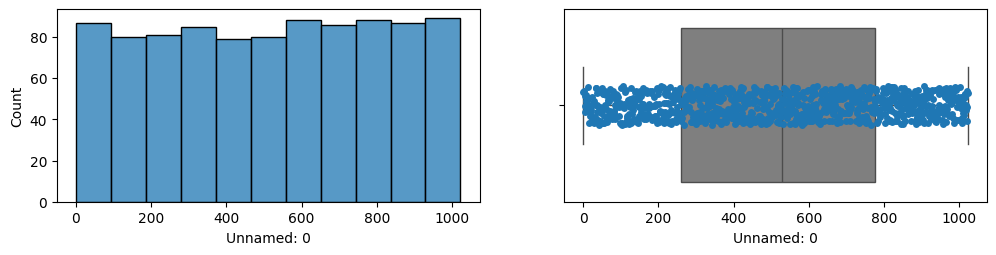

Соотношение матрица-наполнитель: iq=0


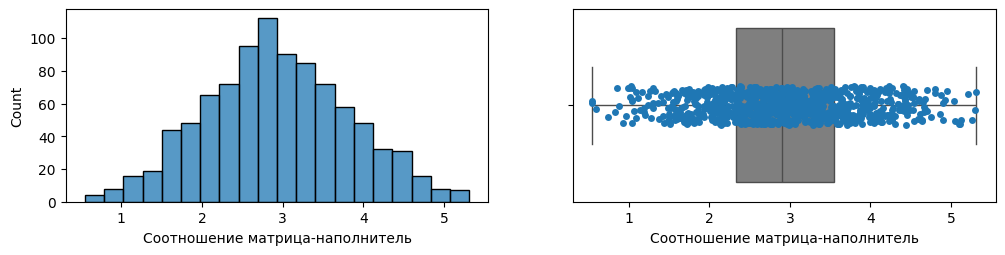

Плотность, кг/м3: iq=0


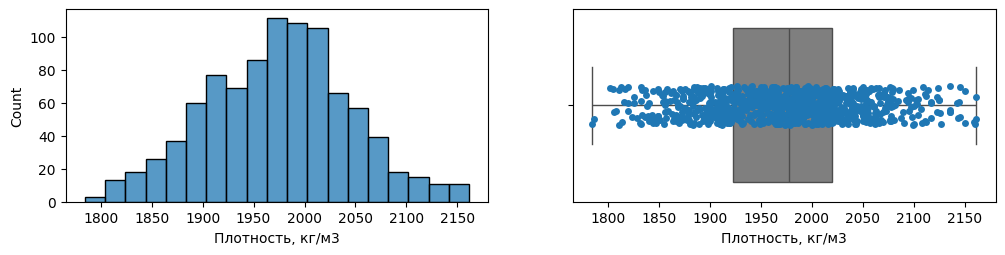

модуль упругости, ГПа: iq=0


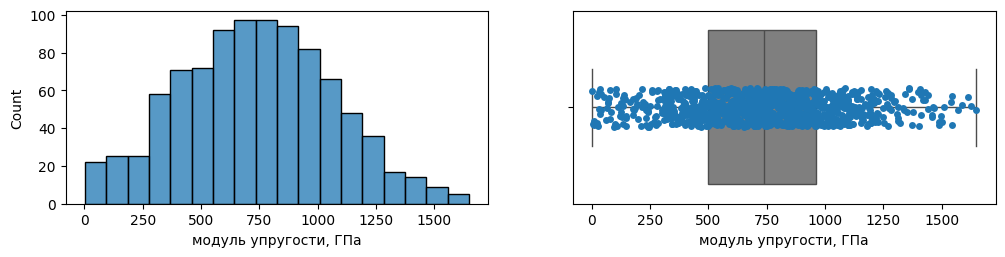

Количество отвердителя, м.%: iq=0


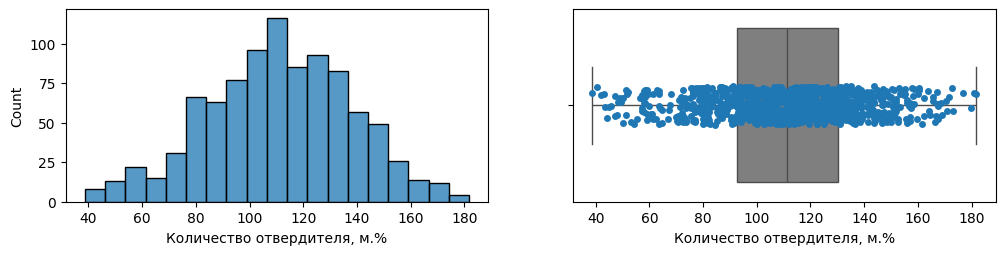

Содержание эпоксидных групп,%_2: iq=0


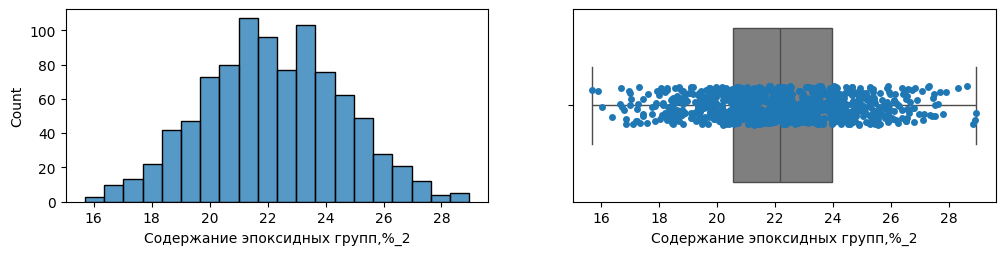

Температура вспышки, С_2: iq=0


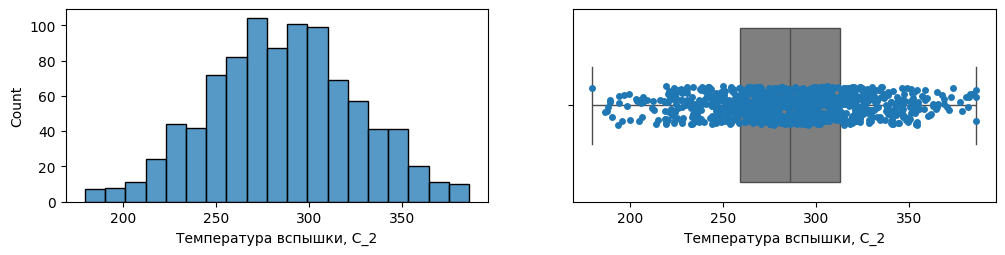

Поверхностная плотность, г/м2: iq=0


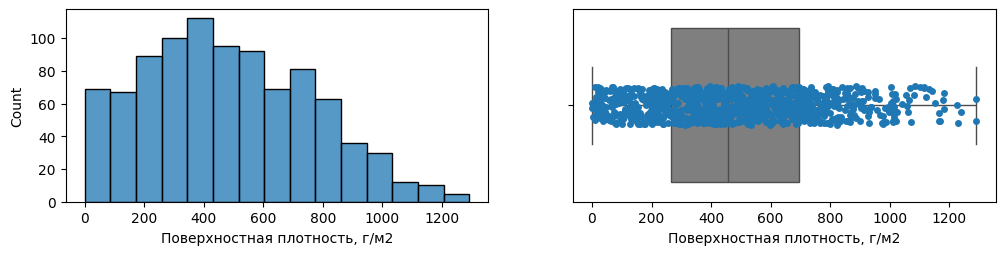

Модуль упругости при растяжении, ГПа: iq=0


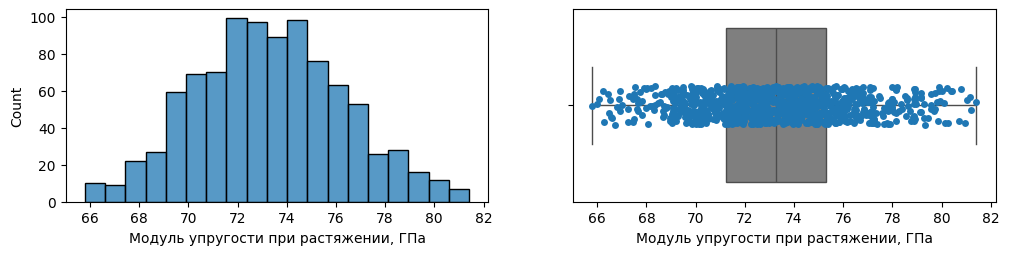

Прочность при растяжении, МПа: iq=1


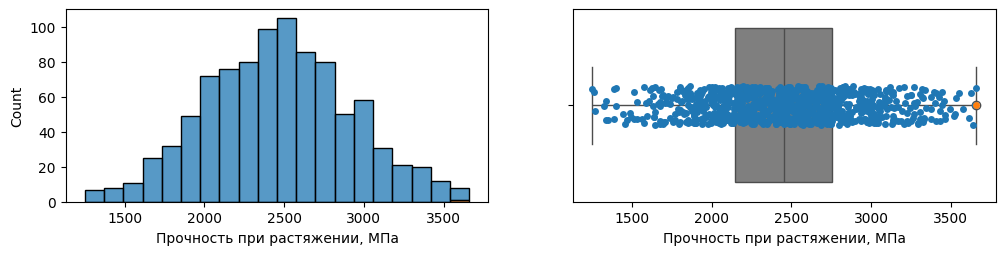

Потребление смолы, г/м2: iq=1


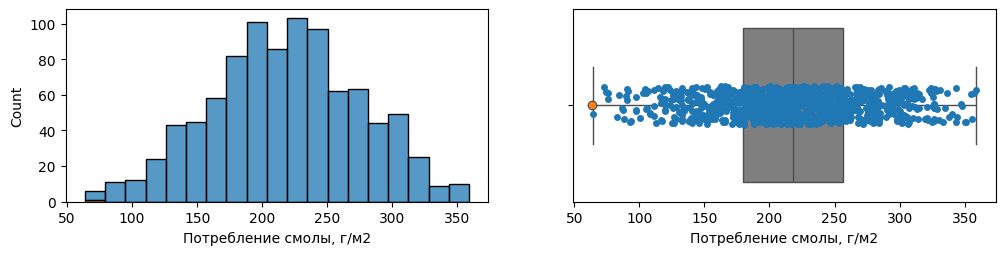

Угол нашивки: iq=0


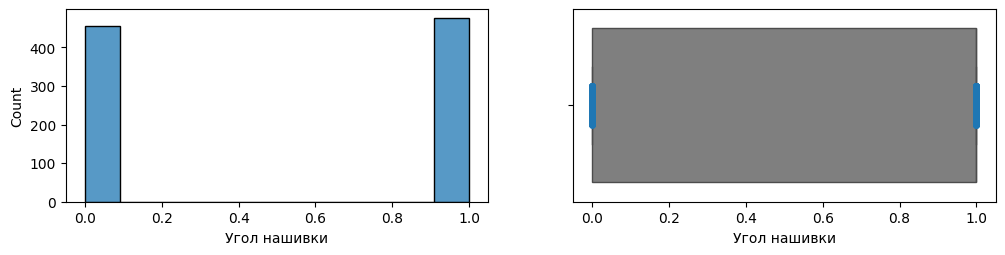

Шаг нашивки: iq=0


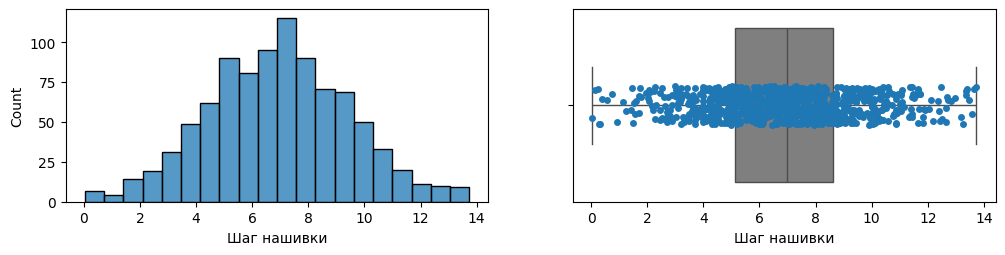

Плотность нашивки: iq=2


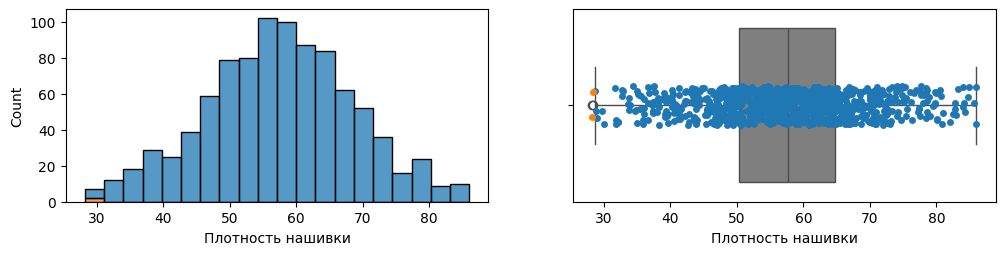

Метод межквартильных расстояний, выбросов: 4


In [459]:
# Проверяем как выглядят box-plot-ы после устранения выбросов
count_iq = 0
for column in df_norm:
    d = df_norm.loc[:, [column]]
    q1 = np.quantile(df_norm[column], 0.25)
    q3 = np.quantile(df_norm[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df_norm[column] <= lower) | (df_norm[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: iq={}'.format(column, d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='iq', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод межквартильных расстояний, выбросов:', count_iq)

Получился вполне приемлемый результат!

In [460]:
# Получаем асимметрию по всем колонкам
skewness = df_norm.skew()
print("Асимметрия по всем признакам:")
print(skewness)

Асимметрия по всем признакам:
Unnamed: 0                             -0.039160
Соотношение матрица-наполнитель         0.052494
Плотность, кг/м3                        0.003131
модуль упругости, ГПа                   0.079172
Количество отвердителя, м.%            -0.116224
Содержание эпоксидных групп,%_2         0.032819
Температура вспышки, С_2                0.006865
Поверхностная плотность, г/м2           0.360442
Модуль упругости при растяжении, ГПа    0.126903
Прочность при растяжении, МПа           0.059710
Потребление смолы, г/м2                -0.037679
Угол нашивки                           -0.043090
Шаг нашивки                             0.044256
Плотность нашивки                      -0.059397
dtype: float64


Коэффициента ассиметриии больше 1 не наблюдается. Это не плохо!

In [461]:
df_norm.isnull().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

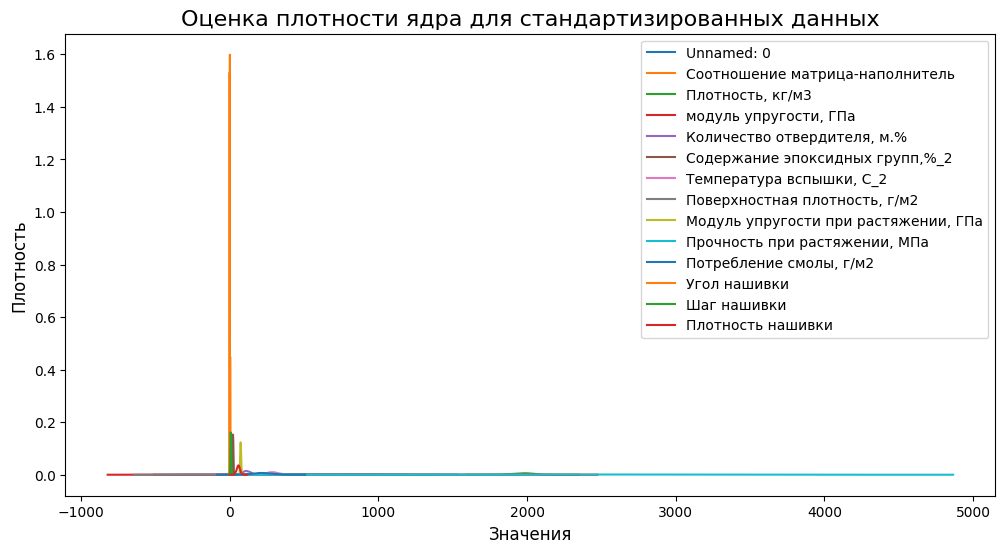

In [462]:
# Создаем график KDE (оценка плотности ядра) для нормализованных данных df_norm
fig, ax = plt.subplots(figsize=(12, 6))

# Строим график плотности распределения для каждого признака
df_norm.plot(kind='kde', ax=ax)

# Настроим заголовок и метки для улучшения визуализации
plt.title("Оценка плотности ядра для стандартизированных данных", fontsize=16)
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Плотность", fontsize=12)

# Показать график
plt.show()

In [463]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 1 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            930 non-null    int64  
 1   Соотношение матрица-наполнитель       930 non-null    float64
 2   Плотность, кг/м3                      930 non-null    float64
 3   модуль упругости, ГПа                 930 non-null    float64
 4   Количество отвердителя, м.%           930 non-null    float64
 5   Содержание эпоксидных групп,%_2       930 non-null    float64
 6   Температура вспышки, С_2              930 non-null    float64
 7   Поверхностная плотность, г/м2         930 non-null    float64
 8   Модуль упругости при растяжении, ГПа  930 non-null    float64
 9   Прочность при растяжении, МПа         930 non-null    float64
 10  Потребление смолы, г/м2               930 non-null    float64
 11  Угол нашивки           

In [464]:
#Сохраняем без выбросов датасет, чтобы в excel проверить дополнительно
df_norm.to_csv('cleaned_data_2_psi.csv', encoding = 'cp1251' )
df_norm.to_excel("cleaned_data_2_psi.xlsx")

In [465]:
mean_and_50 = df_norm.describe()
mean_and_50.loc[['mean', '50%']]

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
mean   518.68172                         2.928586       1974.004810   
50%    529.00000                         2.906630       1977.321002   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
mean             738.039700                   111.031247   
50%              738.736842                   111.162090   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
mean                        22.205624                285.977739   
50%                         22.178471                286.024118   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
mean                     482.445532                             73.310238   
50%                      457.732246                             73.259230   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
mean                    2463.473829               217.608336      0.510753   
50%                     2456.394188               218.250769      1.000000   

      Шаг нашивки  Плотность нашивки  
mean     6.926952          57.513904  
50%      6.972862          57.609295

In [466]:
# Применяем нормализацию данных с использованием Normalizer
normalizer = Normalizer()  # Создаем объект для нормализации данных
res = normalizer.fit_transform(df_norm)  # Применяем нормализацию к данным

# Преобразуем результат обратно в DataFrame с теми же именами столбцов
df_norm_n = pd.DataFrame(res, columns = df_norm.columns)

# Выводим преобразованный датасет для проверки
df_norm_n

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0      0.000269                         0.000499          0.545436   
1      0.000805                         0.000499          0.545011   
2      0.001074                         0.000744          0.544829   
3      0.001348                         0.000746          0.539270   
4      0.001633                         0.000699          0.519918   
..          ...                              ...               ...   
925    0.299413                         0.000668          0.574145   
926    0.303916                         0.001027          0.611437   
927    0.284168                         0.000914          0.549496   
928    0.311960                         0.001132          0.631497   
929    0.276275                         0.001029          0.511032   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
0                 0.198490                     0.013434   
1                 0.198335                     0.034634   
2                 0.202097                     0.030022   
3                 0.201687                     0.030161   
4                 0.219672                     0.030449   
..                     ...                          ...   
925               0.268488                     0.025586   
926               0.132641                     0.043539   
927               0.116129                     0.030794   
928               0.226553                     0.043203   
929               0.112812                     0.034922   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           0.006381                  0.076473   
1                           0.005705                  0.080543   
2                           0.005976                  0.076388   
3                           0.006004                  0.076742   
4                           0.006062                  0.077475   
..                               ...                       ...   
925                         0.005919                  0.095522   
926                         0.005846                  0.075820   
927                         0.006674                  0.069210   
928                         0.005881                  0.084263   
929                         0.007427                  0.081356   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                         0.056424                              0.018808   
1                         0.056380                              0.018793   
2                         0.056362                              0.018787   
3                         0.056623                              0.018874   
4                         0.057164                              0.019055   
..                             ...                                   ...   
925                       0.061529                              0.021497   
926                       0.104584                              0.021749   
927                       0.206201                              0.020821   
928                       0.195996                              0.022623   
929                       0.205111                              0.020088   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
0                         0.806064                 0.059111      0.000000   
1                         0.805435                 0.059065      0.000000   
2                         0.805166                 0.059046      0.000000   
3                         0.808905                 0.059320      0.000000   
4                         0.816626                 0.059886      0.000000   
..                             ...                      ...           ...   
925                       0.702147                 0.036767      0.000294   
926                       0.703985                 0.035113      0.000298   
927                       0.741876                 0.065

In [467]:
df_norm_n.describe()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
count  930.000000                       930.000000        930.000000   
mean     0.152968                         0.000871          0.587174   
std      0.087668                         0.000281          0.062731   
min      0.000269                         0.000161          0.443150   
25%      0.076546                         0.000674          0.542791   
50%      0.153931                         0.000858          0.583427   
75%      0.227261                         0.001049          0.627466   
max      0.354387                         0.001803          0.797127   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             930.000000                   930.000000   
mean                0.217169                     0.033064   
std                 0.094761                     0.008833   
min                 0.000701                     0.011337   
25%                 0.148451                     0.027138   
50%                 0.217535                     0.032866   
75%                 0.284066                     0.039028   
max                 0.525061                     0.062843   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       930.000000                930.000000   
mean                          0.006607                  0.085082   
std                           0.000992                  0.014717   
min                           0.004098                  0.049217   
25%                           0.005894                  0.074819   
50%                           0.006554                  0.083882   
75%                           0.007243                  0.095291   
max                           0.010553                  0.143094   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     930.000000                            930.000000   
mean                        0.142527                              0.021811   
std                         0.082344                              0.002424   
min                         0.000229                              0.015974   
25%                         0.079105                              0.020088   
50%                         0.137476                              0.021628   
75%                         0.200157                              0.023387   
max                         0.414069                              0.030433   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки  \
count                     930.000000               930.000000    930.000000   
mean                        0.719756                 0.064676      0.000150   
std                         0.070527                 0.018273      0.000149   
min                         0.463101                 0.017228      0.000000   
25%                         0.678316                 0.051837      0.000000   
50%                         0.728010                 0.064478      0.000238   
75%                         0.771549                 0.077007      0.000293   
max                         0.874715                 0.122192      0.000407   

       Шаг нашивки  Плотность нашивки  
count   930.000000         930.000000  
mean      0.002065           0.017098  
std       0.000794           0.003737  
min       0.000011           0.007138  
25%       0.001517           0.014578  
50%       0.002035           0.017041  
75%       0.002567           0.019439  
max       0.004517           0.029980

## Модели и их применение

Цитата: "При построении моделей необходимо провести оптимизацию гиперпараметров с использованием поиска по сетке с кросс-валидацией, при этом количество блоков для проверки составляет 10."

Данные в нашем финальном датасете в основном являются непрерывными, что предполагает использование регрессионных моделей для решения задачи прогнозирования. 

ЛИНЕЙНЫХ ЗАВИСИМОСТЕЙ МЕЖДУ МАТРИКАМИ НЕ ОБНАРУЖИВАЕТСЯ! 

Буду пытаться использовать категориальные методы (например, алгоритм ближайших соседей) или методы глубокого обучения, чтобы выявить дополнительные скрытые зависимости!



### 1. Создание необходимых выборок

In [468]:
# Разделяем данные на обучающую и тестовую выборки, целевую переменную
# Целевая переменная (y) - это столбец 'Прочность при растяжении, МПа'
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Прочность при растяжении, МПа'],
    df_norm[['Прочность при растяжении, МПа']],  
    test_size=0.3,  # 30% данных выделяется на тестирование
    random_state=42) 

In [469]:
# Размер выборок
print(f"Размер обучающей выборки X: {x_train_1.shape}")
print(f"Размер тестовой выборки X: {x_test_1.shape}")
print(f"Размер обучающей выборки y: {y_train_1.shape}")
print(f"Размер тестовой выборки y: {y_test_1.shape}")

Размер обучающей выборки X: (651, 13)
Размер тестовой выборки X: (279, 13)
Размер обучающей выборки y: (651, 1)
Размер тестовой выборки y: (279, 1)


In [472]:
x_train_1.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
606    0.196037                         0.001083          0.568171   
593    0.189208                         0.000803          0.557781   
485    0.160933                         0.000862          0.585413   
494    0.166018                         0.000705          0.543548   
752    0.266275                         0.000783          0.632986   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
606               0.260409                     0.046321   
593               0.117423                     0.030970   
485               0.224355                     0.022868   
494               0.170636                     0.027883   
752               0.199259                     0.041747   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
606                         0.004989                  0.091717   
593                         0.007042                  0.108600   
485                         0.005831                  0.066522   
494                         0.006564                  0.076239   
752                         0.007641                  0.078756   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
606                       0.102397                              0.022892   
593                       0.141409                              0.021314   
485                       0.213624                              0.020376   
494                       0.074344                              0.019811   
752                       0.088278                              0.023323   

     Потребление смолы, г/м2  Угол нашивки  Шаг нашивки  Плотность нашивки  
606                 0.060318      0.000289     0.001303           0.018037  
593                 0.069606      0.000285     0.001754           0.014461  
485                 0.033359      0.000292     0.001865           0.012800  
494                 0.084378      0.000296     0.001435           0.021503  
752                 0.040489      0.000319     0.003732           0.017139

In [473]:
y_train_1

Прочность при растяжении, МПа
679                    2557.882610
665                    2724.654878
551                    2489.604245
560                    2672.537036
835                    2150.828833
..                             ...
120                    1994.674603
304                    3056.993289
950                    3321.035587
492                    2493.801932
113                    1529.604423

[651 rows x 1 columns]

### 2. Функция для базовой модели

In [474]:
# Функция для создания базвовой модели, которая предсказывает среднее значение целевой переменной на основе тестовой выборки
# Функция возвращает список, где  для каждого примера тестовой выборки  возвращается среднее значение целевой переменной расчитанное по всей выборке
def mean_model(y_test):
    return [np.mean(y_test) for _ in range(len(y_test))]

# Применяем функцию к тестовой выборке и сохраняем предсказания в переменную y_1_pred_psi
y_1_pred_psi = mean_model(y_test_1)

In [475]:
# Результаты модели, которая предсказывает медианное значение (baseline модель)

# MAE для базовой модели
mae_mean_target = mean_absolute_error(y_test_1, y_1_pred_psi)
# MSE для той же модели
mse_mean_target = mean_squared_error(y_test_1, y_1_pred_psi)
# RMSE для модели, которая всегда предсказывает среднее значение
rmse_mean_target = np.sqrt(mse_mean_target)

# Выводим результаты на экран
print('Base Model:')
print("MAE for mean target: ", mae_mean_target)  # Средняя абсолютная ошибка
print("MSE for mean target: ", mse_mean_target)  # Среднеквадратичная ошибка
print("RMSE for mean target: ", rmse_mean_target)  # Корень из среднеквадратичной ошибки

Base Model:
MAE for mean target:  353.64838011141796
MSE for mean target:  190943.95789898073
RMSE for mean target:  436.9713467711364


### 2.1 Функция визуализации данных

In [477]:
def draw_res (y1,model_name,y2=y_test_1,y3=y_1_pred_psi):
    plt.figure(figsize=(30, 7)) 
    plt.title("Тестовые и прогнозные значения"+" " + model_name) 
    # Строим график прогнозных значений модели SVR
    plt.plot(y1, label="Прогноз", color="orange")
    # Строим график фактических тестовых значений
    plt.plot(y2.values, label="Тест", color="green")
    # Строим график базовой модели
    plt.plot(y3, label="База", color="red")
    # Добавляем подписи для осей
    plt.xlabel("Количество наблюдений")  # Ось X - количество наблюдений
    plt.ylabel("Прочность при растяжении, МПа")  # Ось Y - прочность при растяжении
    # Добавляем легенду для различения графиков
    plt.legend()
    # Включаем сетку для улучшения визуализации
    plt.grid(True)
    # Отображаем график
    plt.show()
    return 0

### 3. Метод опорных векторов

In [478]:
# Создание модели с использованием Support Vector Regression (SVR) с разными ядрами (rbf, poly, sigmoid)
svr_rbf = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=500, epsilon=1))
svr_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=500, epsilon=1))
svr_sigmoid = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=500, epsilon=1))

# Обучаем модель на тренировочных данных
svr_rbf.fit(x_train_1, np.ravel(y_train_1))
svr_poly.fit(x_train_1, np.ravel(y_train_1))
svr_sigmoid.fit(x_train_1, np.ravel(y_train_1))

# Прогнозирование значений на тестовой выборке
y_pred_svr_rbf = svr_rbf.predict(x_test_1)
y_pred_svr_poly = svr_poly.predict(x_test_1)
y_pred_svr_sigmoid = svr_sigmoid.predict(x_test_1)

# Оценка качества модели с использованием различных метрик
mae_svr_rbf = mean_absolute_error(y_test_1, y_pred_svr_rbf)  
mse_svr_elast_rbf = mean_squared_error(y_test_1, y_pred_svr_rbf)  
mae_svr_poly = mean_absolute_error(y_test_1, y_pred_svr_poly) 
mse_svr_elast_poly = mean_squared_error(y_test_1, y_pred_svr_poly)  
mae_svr_sigmoid = mean_absolute_error(y_test_1, y_pred_svr_sigmoid)  
mse_svr_elast_sigmoid = mean_squared_error(y_test_1, y_pred_svr_sigmoid)  

# Выводим результаты на экран
##print('Support Vector Regression Results Train:')
print(f"Train score: {svr_rbf.score(x_train_1, y_train_1):.10f}")  # Скор для тренировочной выборки
print(f"Test score: {svr_rbf.score(x_test_1, y_test_1):.10f}")  # Скор для тестовой выборки

print('Support Vector Regression Results:')
# Средняя абсолютная ошибка
print(f'MAE_SVR_RBF: {mae_svr_rbf:.10f}') 
print(f'MAE_SVR_POLY: {mae_svr_poly:.10f}') 
print(f'MAE_SVR_SIGMOID: {mae_svr_sigmoid:.10f}') 
##print(f'MAPE_SVR: {mean_absolute_percentage_error(y_test_1, y_pred_svr):.5f}')  # Средняя абсолютная ошибка в процентах
# # Среднеквадратичная ошибка
print(f'MSE_SVR_RBF: {mse_svr_elast_rbf:.10f}') 
print(f'MSE_SVR_POLY: {mse_svr_elast_poly:.10f}') 
print(f'MSE_SVR_SIGMOID: {mse_svr_elast_sigmoid:.10f}') 
# Корень из среднеквадратичной ошибки (RMSE)
print(f'RMSE_SVR_RBF: {np.sqrt(mse_svr_elast_rbf):.10f}')  
print(f'RMSE_SVR_POLY: {np.sqrt(mse_svr_elast_poly):.10f}')  
print(f'RMSE_SVR_SIGMOID: {np.sqrt(mse_svr_elast_sigmoid):.10f}')  


Train score: 0.9917276549
Test score: 0.9481262216
Support Vector Regression Results:
MAE_SVR_RBF: 71.0642233037
MAE_SVR_POLY: 152.4513079035
MAE_SVR_SIGMOID: 1251.2731914753
MSE_SVR_RBF: 9904.9845495687
MSE_SVR_POLY: 51098.4459808423
MSE_SVR_SIGMOID: 4840139.7531778757
RMSE_SVR_RBF: 99.5237888626
RMSE_SVR_POLY: 226.0496537950
RMSE_SVR_SIGMOID: 2200.0317618566


После попытки оптимизировать параметры  модели  (С и эпсилон) результаты  не приводили к каким-то более  хорошим, чем результаты базовой  модели - медианы по средним значениям

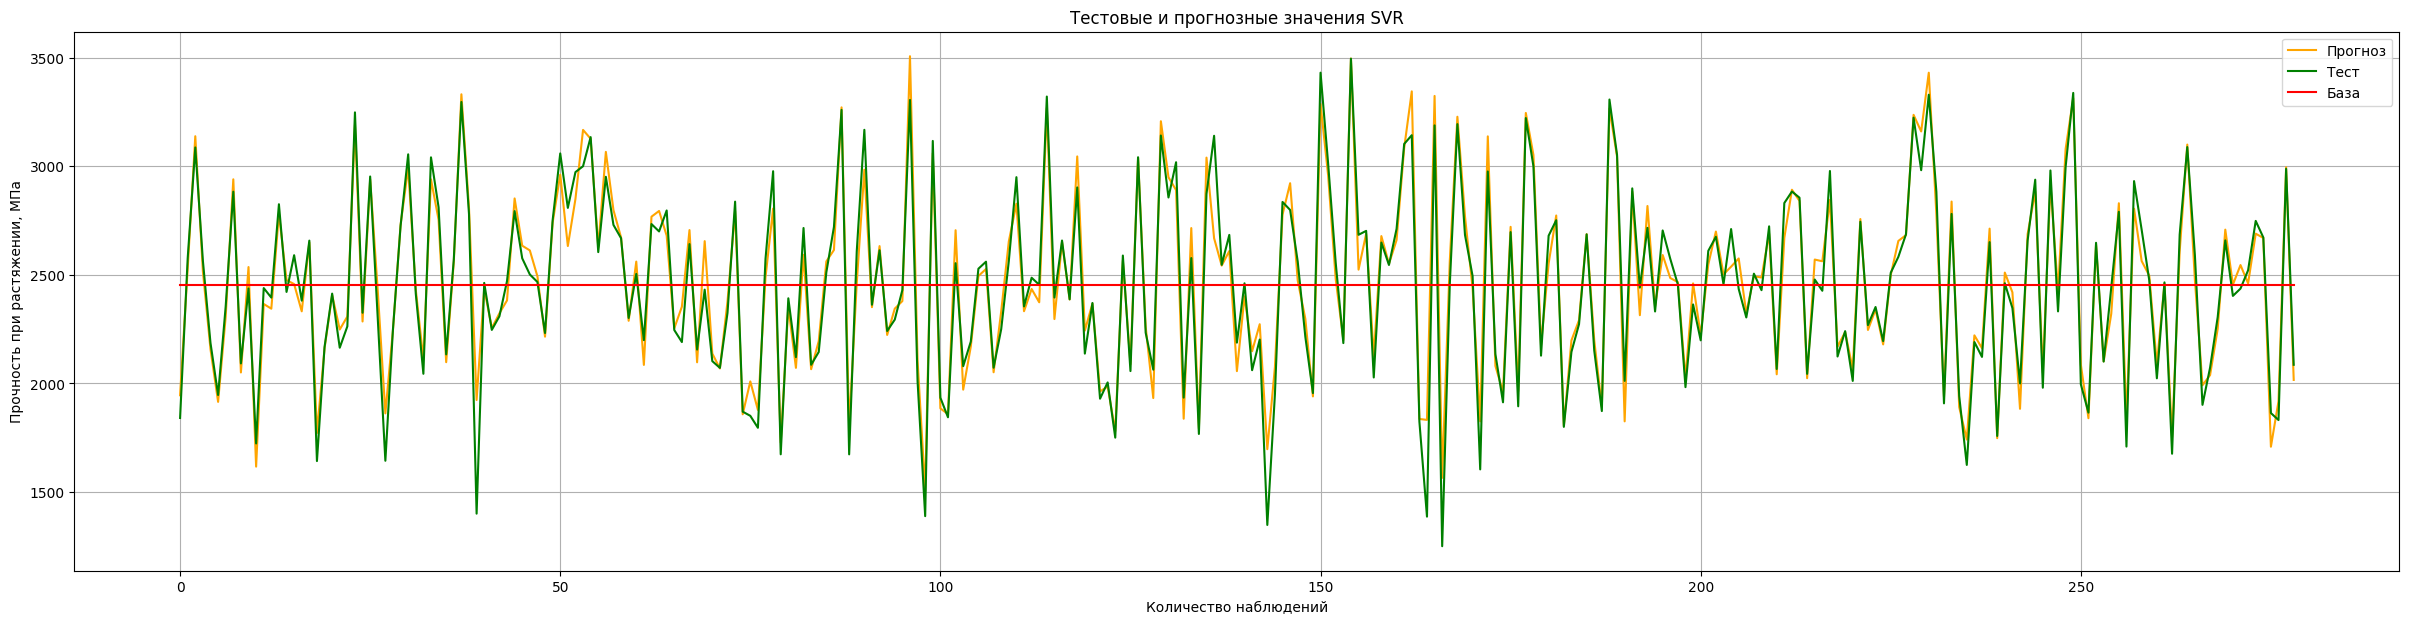

In [479]:
draw=draw_res (y_pred_svr_rbf,"SVR")

### 3. Метод случайного леса - Random Forest Regressor

In [419]:
# Инициализация модели случайного леса с заданными гиперпараметрами
# rfr = RandomForestRegressor(n_estimators=15, max_depth=7, random_state=33)
rfr = RandomForestRegressor(n_estimators=30, max_features=4, max_depth=50, random_state=33)
# Обучаем модель на тренировочных данных
rfr.fit(x_train_1, y_train_1.values)

# Прогнозируем значения на тестовой выборке
y_pred_forest = rfr.predict(x_test_1)

# Оценка модели с помощью различных метрик
mae_rfr = mean_absolute_error(y_test_1, y_pred_forest)  # Средняя абсолютная ошибка
mse_rfr_elast = mean_squared_error(y_test_1, y_pred_forest)  # Среднеквадратическая ошибка

# Вывод результатов на тренировочной выборке
print('Random Forest Regressor Results Train:')
print(f"Score (Train set): {rfr.score(x_train_1, y_train_1):.2f}")  # Скор для тренировочной выборки
print(f"Score (Test set): {rfr.score(x_test_1, y_test_1):.2f}")  # Скор для тестовой выборки

# Вывод метрик для тестовой выборки
print(f'MAE_RF: {round(mae_rfr, 2)}')  # Средняя абсолютная ошибка
# print(f'MAPE_RF: {round(mean_absolute_percentage_error(y_test_1, y_pred_forest), 2):.2f}')  # Средняя абсолютная процентная ошибка
print(f'MSE_RF: {round(mse_rfr_elast, 2):.2f}')  # Среднеквадратическая ошибка
print(f"RMSE_RF: {round(np.sqrt(mse_rfr_elast), 2):.2f}")  # Корень из среднеквадратической ошибки



Random Forest Regressor Results Train:
Score (Train set): 0.85
Score (Test set): -0.06
MAE_RF: 361.01
MSE_RF: 202322.71
RMSE_RF: 449.80


c:\Users\sipronk1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


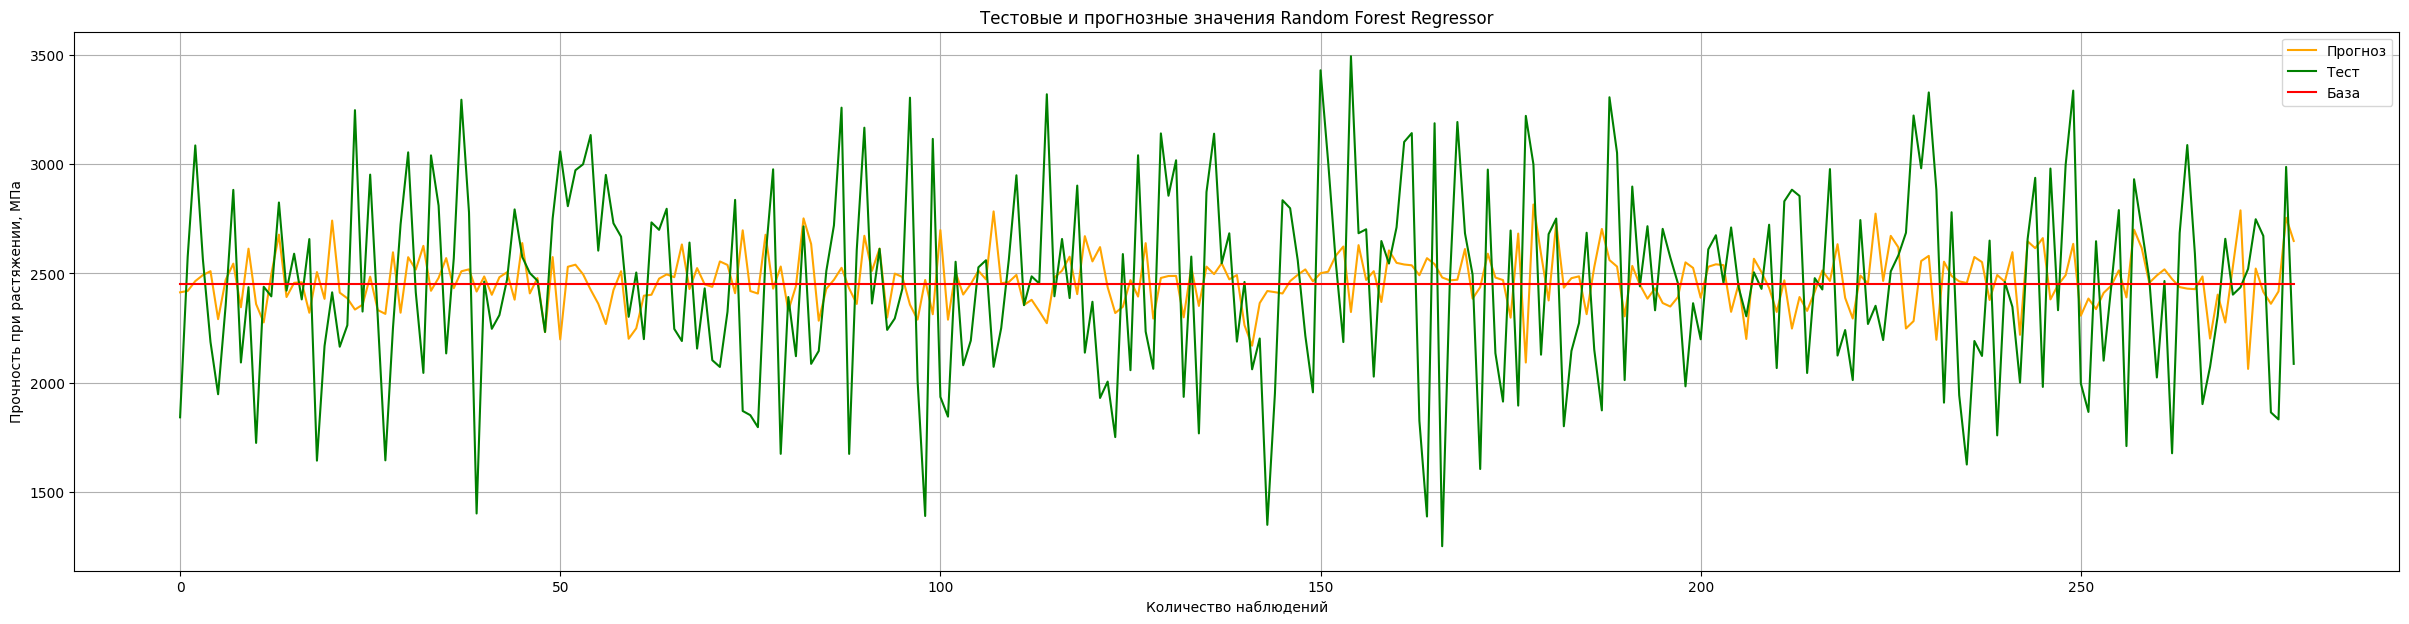

In [420]:
draw=draw_res (y_pred_forest,"Random Forest Regressor")

# 3. Метод линейной регрессии - Linear Regression

In [421]:
# Создаем модель линейной регрессии
lr = LinearRegression()

# Обучаем модель на тренировочной выборке
lr.fit(x_train_1, y_train_1)

# Прогнозируем на тестовой выборке
y_pred_lr = lr.predict(x_test_1)

# Вычисляем метрики качества модели
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lr = mean_squared_error(y_test_1, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Выводим результаты для тренировки
print("Linear Regression Results:")
print(f"Training score (R^2): {lr.score(x_train_1, y_train_1):.2f}")
print(f"Test score (R^2): {lr.score(x_test_1, y_test_1):.2f}")

# Выводим результаты для тестирования
print(f"MAE (Mean Absolute Error): {mae_lr:.2f}")
# print(f"MAPE (Mean Absolute Percentage Error): {mean_absolute_percentage_error(y_test_1, y_pred_lr):.2f}")
print(f"MSE (Mean Squared Error): {mse_lr:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lr:.2f}")

Linear Regression Results:
Training score (R^2): 0.02
Test score (R^2): 0.00
MAE (Mean Absolute Error): 357.76
MSE (Mean Squared Error): 190846.99
RMSE (Root Mean Squared Error): 436.86


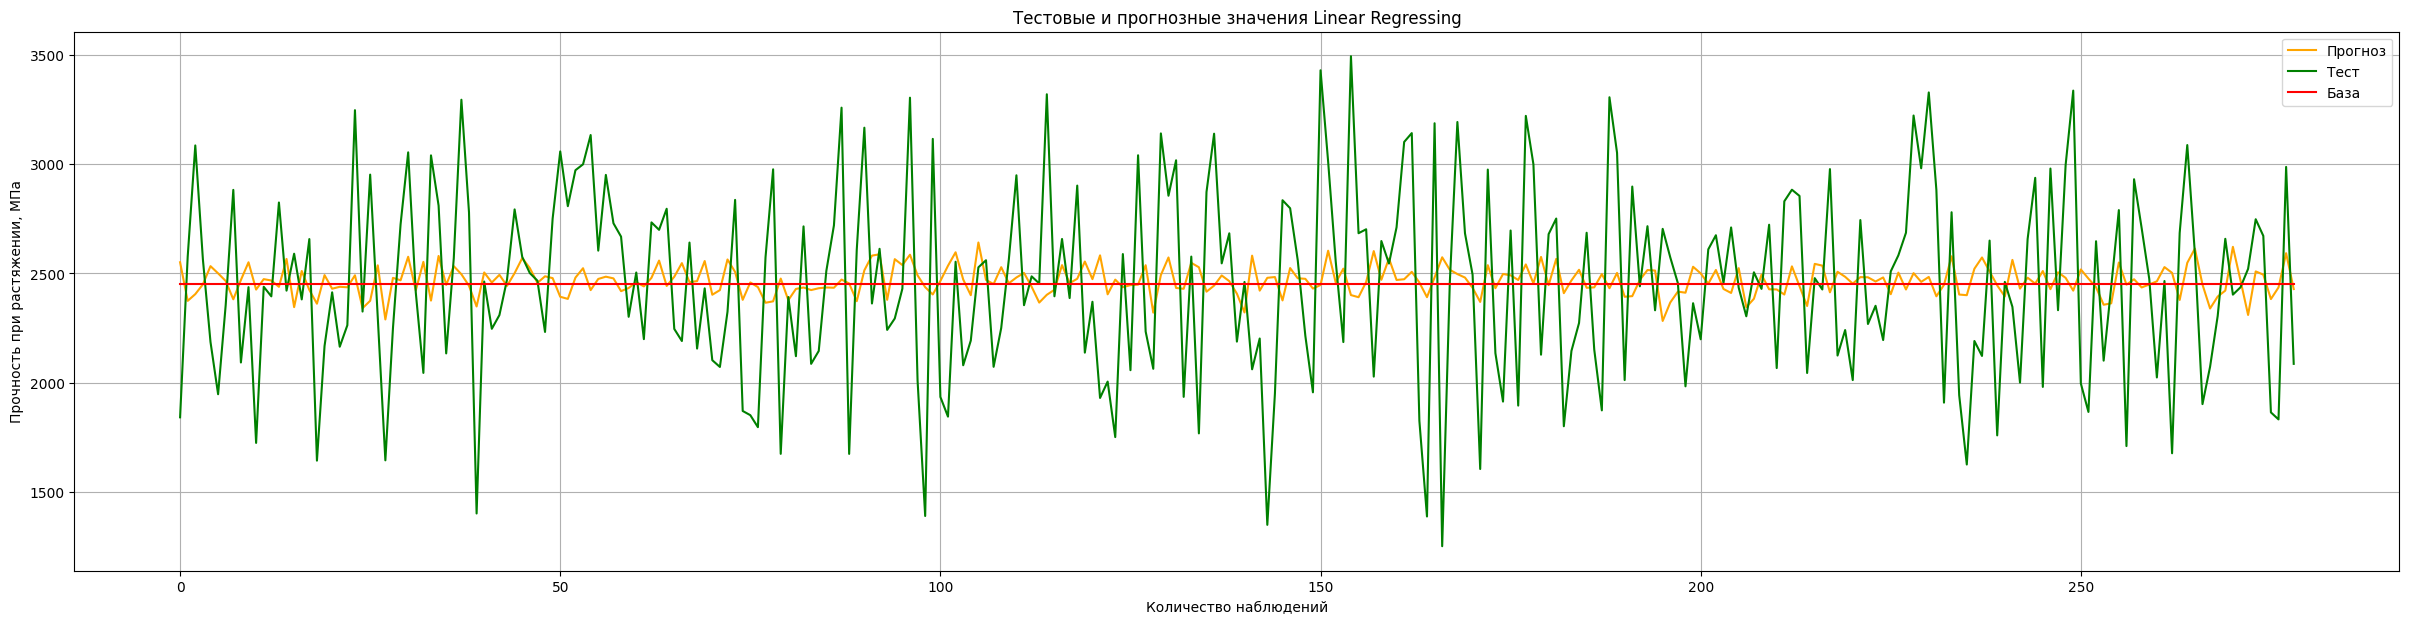

In [422]:
draw=draw_res (y_pred_lr,"Linear Regressing")

## Визуализация ошибки предсказания

In [170]:
def error_stat_psi (y_test_mod, y_pred_mod):
    error = y_test_mod - y_pred_mod
    # Строим гистограмму ошибок
    plt.figure(figsize=(10, 7))
    plt.hist(error, bins=25, color="r", edgecolor='black', alpha=0.7)
    # # Настройка подписей и заголовка
    plt.xlabel('Ошибка предсказания', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.title('Гистограмма ошибок предсказания Linear Regression', fontsize=14)
    # Показываем график
    plt.show()
    return error

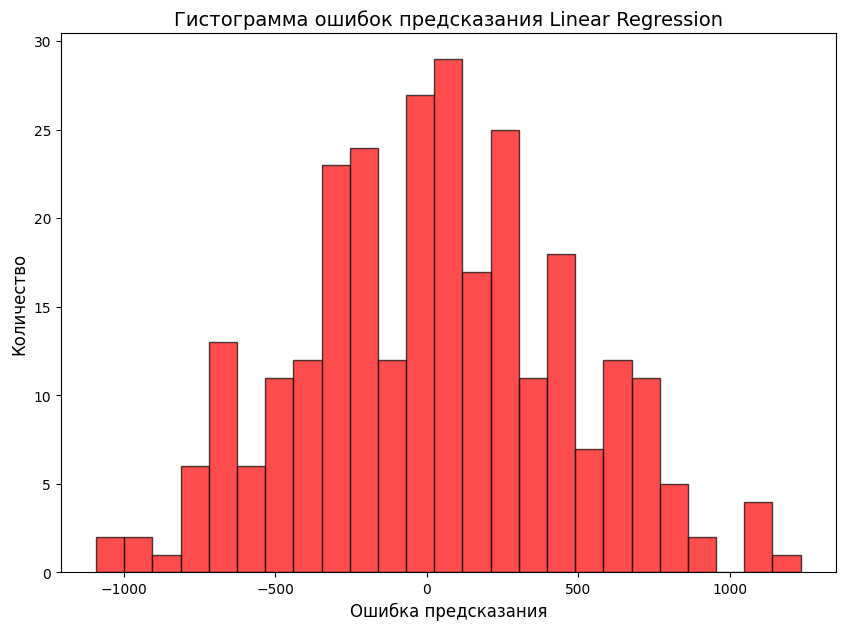

In [300]:
error=error_stat_psi (y_test_1, y_pred_lr)

### 4. Метод градиентного бустинга - Gradient Boosting Regressor

In [301]:
# Создание и обучение модели Gradient Boosting Regressor
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())

# Обучение модели
gbr.fit(x_train_1, np.ravel(y_train_1))

# Прогнозирование
y_pred_gbr = gbr.predict(x_test_1)

# Расчет различных метрик
mae_gbr = mean_absolute_error(y_test_1, y_pred_gbr)
mse_gbr_elast = mean_squared_error(y_test_1, y_pred_gbr)

# Вывод результатов на тренировочной выборке
print('Gradient Boosting Regressor Results:')
print("Score for training data: {:.10f}".format(gbr.score(x_train_1, y_train_1)))  
print(f"Score for test data: {gbr.score(x_test_1, y_test_1):.10f}") 

# Вывод результатов на тестовой выборке
print(f'MAE_GBR: {mae_gbr:.10f}')  # Средняя абсолютная ошибка
## print(f'MAPE_GBR: {mean_absolute_percentage_error(y_test_1, y_pred_gbr):.2f}')  # Средняя абсолютная процентная ошибка
print(f'MSE_GBR: {mse_gbr_elast:.10f}')  # Среднеквадратическая ошибка
print(f"RMSE_GBR: {np.sqrt(mse_gbr_elast):.10f}")  # Корень из среднеквадратичной ошибки



Gradient Boosting Regressor Results:
Score for training data: 0.5025286232
Score for test data: -0.1021310025
MAE_GBR: 370.0988131757
MSE_GBR: 214085.2530732747
RMSE_GBR: 462.6934763678


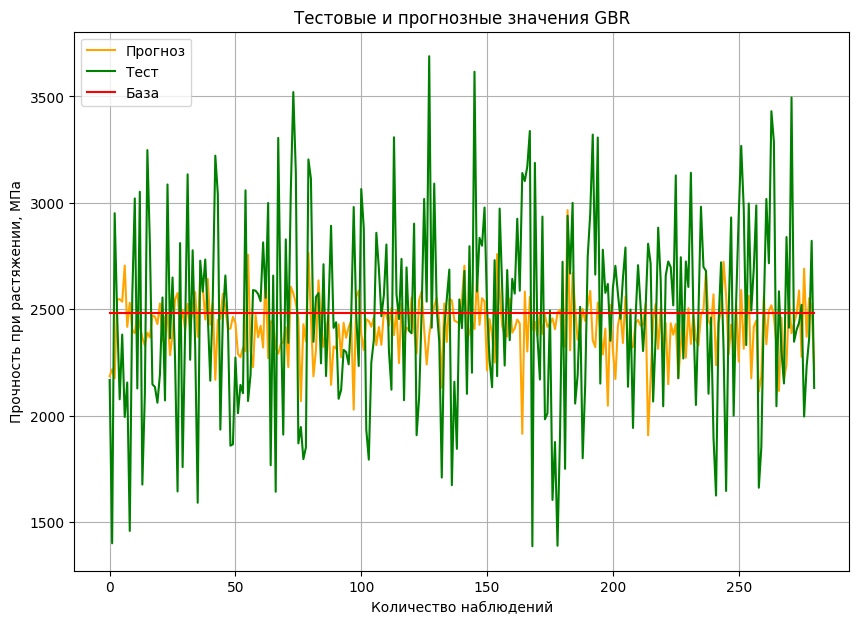

In [302]:
draw=draw_res (y_pred_gbr,"GBR")

### 5. K-Neighbors Regressor

In [303]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)

# Прогнозирование на тестовых данных
y_pred_knn = knn.predict(x_test_1)

# Оценка модели
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)  # Средняя абсолютная ошибка
mse_knn_elast = mean_squared_error(y_test_1, y_pred_knn)  # Среднеквадратическая ошибка

# Вывод результатов для тренировочной выборки
print('K Neighbors Regressor  Results:')
print("Train score: {:.10f}".format(knn.score(x_train_1, y_train_1)))
print("Test score: {:.10f}".format(knn.score(x_test_1, y_test_1)))  

# Вывод результатов для тестовой выборки
print(f'MAE_GBR: {mae_knr:.10f}')   # Средняя абсолютная ошибка
## print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))  # Средняя абсолютная процентная ошибка
print('KNN_MSE: {:.10f}'.format(mse_knn_elast))  # Среднеквадратическая ошибка
print("KNN_RMSE: {:.10f}".format(np.sqrt(mse_knn_elast)))  # Корень из среднеквадратичной ошибки



K Neighbors Regressor  Results:
Train score: 0.2276860035
Test score: -0.1994746697
MAE_GBR: 388.7894405875
KNN_MSE: 232993.9341525324
KNN_RMSE: 482.6944521667


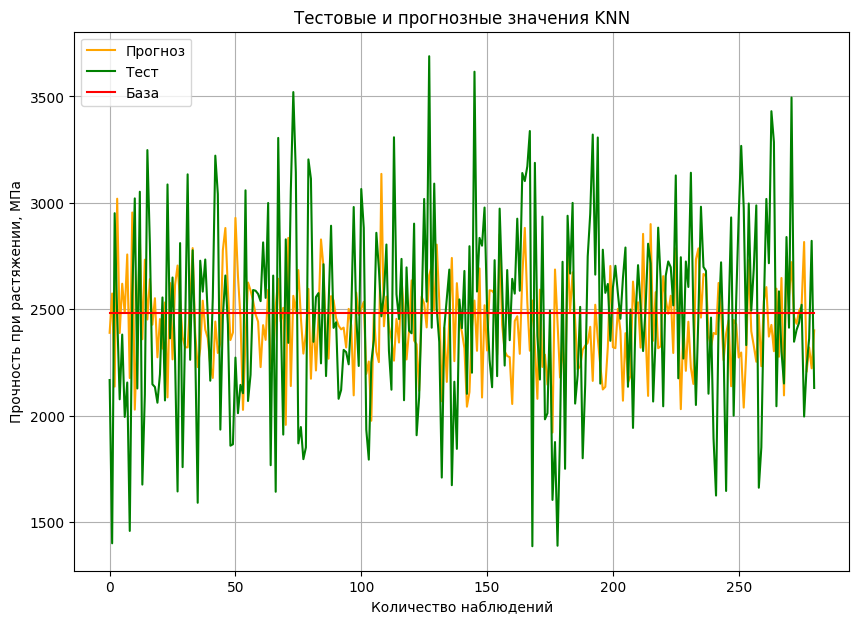

In [304]:
draw=draw_res (y_pred_knn,"KNN")

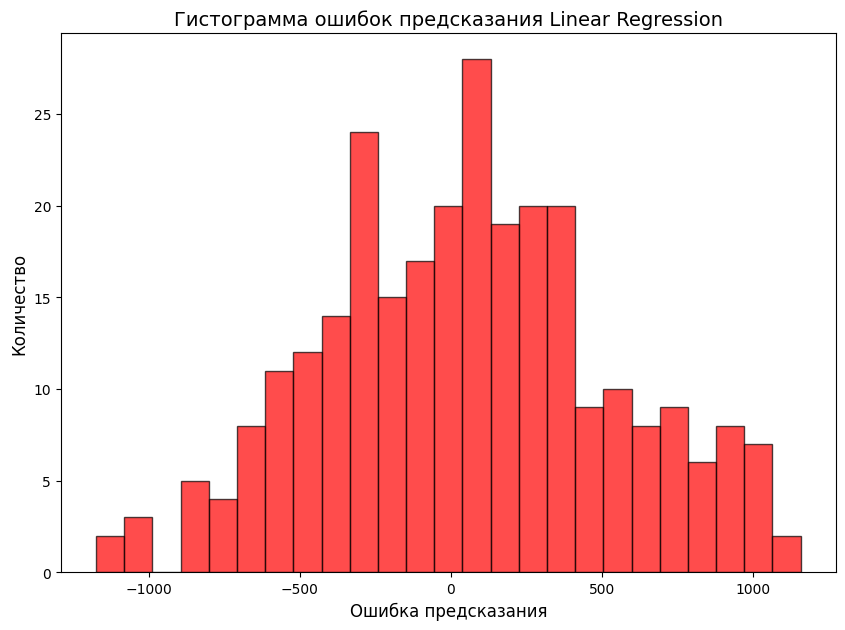

In [305]:
error=error_stat_psi (y_test_1, y_pred_knn)

### 6. Дерево решений

In [306]:
dtr = DecisionTreeRegressor(random_state=10)  # Инициализация модели дерева решений 42
dtr.fit(x_train_1, y_train_1.values)  # Обучаем модель на тренировочных данных

# Прогнозирование
y_pred_dtr = dtr.predict(x_test_1)

# Оценка производительности модели
mae_dtr = mean_absolute_error(y_pred_dtr, y_test_1)  # Средняя абсолютная ошибка
mse_dtr_elast = mean_squared_error(y_test_1, y_pred_dtr)  # Средняя квадратическая ошибка
print('Decision Tree Regressor Results:')
print("Test score: {:.10f}".format(dtr.score(x_test_1, y_test_1)))
print("Train score: {:.10f}".format(dtr.score(x_train_1, y_train_1)))
print(f'MAE_DTR: {mae_dtr:.10f}') # MAE
print('MSE_DTR: {:.10f}'.format(mse_dtr_elast))  # MSE
print("RMSE_DTR: {:.10f}".format(np.sqrt(mse_dtr_elast)))  # RMSE
#print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_dtr)))  # MAPE


Decision Tree Regressor Results:
Test score: -1.0757039078
Train score: 1.0000000000
MAE_DTR: 502.0736744323
MSE_DTR: 403198.5266644837
RMSE_DTR: 634.9791545118


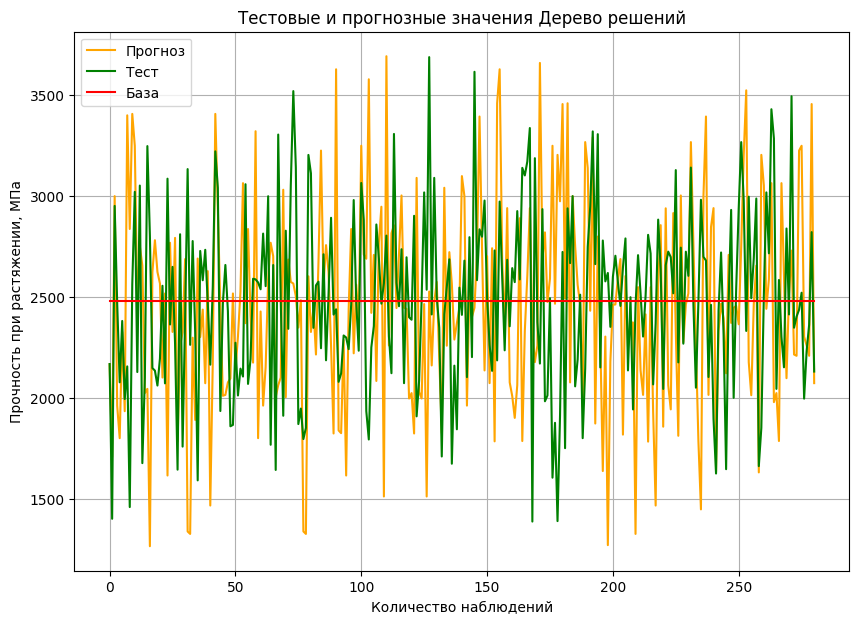

In [307]:
draw=draw_res (y_pred_dtr,"Дерево решений")

In [304]:
## error=error_stat_psi (y_test_1, y_pred_dtr[1])

### 7. Stochastic Gradient Descent Regressor

In [308]:
# Инициализация и обучение модели Stochastic Gradient Descent Regressor
sdg = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)  # Добавлены параметры для стабильной сходимости
sdg.fit(x_train_1, np.ravel(y_train_1))  # Обучаем модель на тренировочных данных

# Прогнозируем значения на тестовой выборке
y_pred_sdg = sdg.predict(x_test_1)

# Оценка модели
mae_sdg = mean_absolute_error(y_test_1, y_pred_sdg)  # Средняя абсолютная ошибка
mse_sdg_elast = mean_squared_error(y_test_1, y_pred_sdg)  # Средняя квадратическая ошибка

# Вывод результатов для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print(f"Train score: {sdg.score(x_train_1, y_train_1):.10f}")  
print(f"Test score: {sdg.score(x_test_1, y_test_1):.10f}")

# Вывод результатов для тестовой выборки
print(f'SGD_MAE: {round(mae_sdg)}')  # MAE
print(f'SGD_MSE: {mse_sdg_elast:.10f}')  # MSE
print(f"SGD_RMSE: {np.sqrt(mse_sdg_elast):.10f}")  # RMSE
# print(f'SGD_MAPE: {mean_absolute_percentage_error(y_test_1, y_pred_sdg):.10f}')  # MAPE


Stochastic Gradient Descent Regressor Results:
Train score: -5530834410377288081211392.0000000000
Test score: -6268659303342392597282816.0000000000
SGD_MAE: 1006132260279422
SGD_MSE: 1217666058160143883342238973952.0000000000
SGD_RMSE: 1103479070105157.8750000000


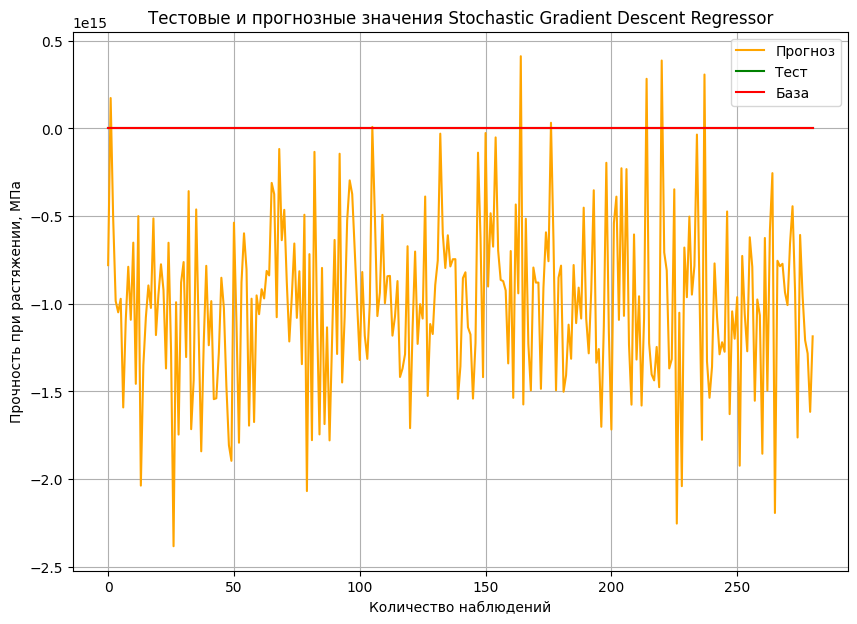

In [309]:
draw=draw_res (y_pred_sdg,"Stochastic Gradient Descent Regressor")

### 8. Модель многослойного персептрона

In [310]:
# Инициализация модели многослойного перцептрона с заданным состоянием случайного числа и максимальным числом итераций
mlp_model = MLPRegressor(random_state=1, max_iter=500)

# Обучение модели на тренировочных данных
mlp_model.fit(x_train_1, y_train_1)

# Прогнозирование на тестовых данных
y_pred_mlp = mlp_model.predict(x_test_1)

# Расчёт метрик качества модели
mae_mlp = mean_absolute_error(y_test_1, y_pred_mlp)
mse_mlp = mean_squared_error(y_test_1, y_pred_mlp)
mape_mlp = mean_absolute_percentage_error(y_test_1, y_pred_mlp)

# Вывод результатов для тренировочной выборки
print('Результаты работы многослойного перцептрона:')
print(f'Train score: {mlp_model.score(x_train_1, y_train_1):.10f}')
print(f'Test score: {mlp_model.score(x_test_1, y_test_1):.10f}')

# Вывод итоговых результатов для тестовой выборки
print(f'MAE_MLP: {mae_mlp:.10f}') 
# print(f'Средняя абсолютная процентная ошибка (MAPE): {mape_mlp:.2f}')
print(f'MSE_MLP: {mse_mlp:.10f}')
print(f'RMSE_MLP: {np.sqrt(mse_mlp):.10f}')


c:\Users\sipronk1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Результаты работы многослойного перцептрона:
Train score: -0.0394619134
Test score: -0.0707988290
MAE_MLP: 362.9694719787
MSE_MLP: 207999.0833832569
RMSE_MLP: 456.0691651310


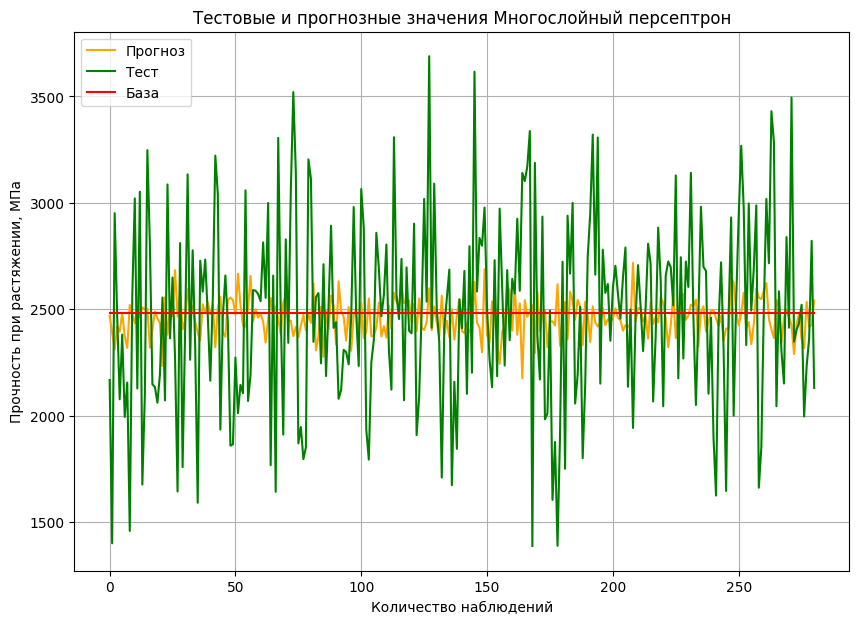

In [311]:
draw=draw_res (y_pred_mlp,"Многослойный персептрон")